# R Tutorial

To install R packages you need to run the following code in the R console:

install.packages("name_of_package")

# 1 Reading in Data and Basic Statistical Functions

## 1.1 Read in the data.

### a) Read the data in as a .csv file.

In [1]:
student <- read.csv("data/class.csv")
head(student)

Name,Sex,Age,Height,Weight
Alfred,M,14,69.0,112.5
Alice,F,13,56.5,84.0
Barbara,F,13,65.3,98.0
Carol,F,14,62.8,102.5
Henry,M,14,63.5,102.5
James,M,12,57.3,83.0


### b) Read the data in as a .xls file.

In [2]:
# call the gdata package
library(gdata)

gdata: read.xls support for 'XLS' (Excel 97-2004) files ENABLED.

gdata: read.xls support for 'XLSX' (Excel 2007+) files ENABLED.

Attaching package: ‘gdata’

The following object is masked from ‘package:stats’:

    nobs

The following object is masked from ‘package:utils’:

    object.size

The following object is masked from ‘package:base’:

    startsWith



In [3]:
student_xls <- read.xls('data/class.xls', 1)
head(student_xls)

Name,Sex,Age,Height,Weight
Alfred,M,14,69.0,112.5
Alice,F,13,56.5,84.0
Barbara,F,13,65.3,98.0
Carol,F,14,62.8,102.5
Henry,M,14,63.5,102.5
James,M,12,57.3,83.0


### Read the data in as a .json file

In [4]:
# call the rjson package
library(rjson)

In [5]:
temp <- fromJSON(file = 'data/class.json')
temp <- do.call('rbind', temp)
temp <- data.frame(temp, stringAsFactors = TRUE)
temp <- transform(temp, Name = unlist(Name), Sex = unlist(Sex), Age = unlist(Age),
                  Height = unlist(Height), Weight = unlist(Weight))
temp$Name <- as.factor(temp$Name)
temp$Sex <- as.factor(temp$Sex)
temp$Age <- as.factor(temp$Age)

student_json <- temp
head(student)

Name,Sex,Age,Height,Weight
Alfred,M,14,69.0,112.5
Alice,F,13,56.5,84.0
Barbara,F,13,65.3,98.0
Carol,F,14,62.8,102.5
Henry,M,14,63.5,102.5
James,M,12,57.3,83.0


## 1.2 Find the dimensions of the data set.

In [6]:
dim(student)

[1] 19  5

## 1.3 Find the basic information about the data set.

In [7]:
str(student)

'data.frame':	19 obs. of  5 variables:
 $ Name  : Factor w/ 19 levels "Alfred","Alice",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Sex   : Factor w/ 2 levels "F","M": 2 1 1 1 2 2 1 1 2 2 ...
 $ Age   : int  14 13 13 14 14 12 12 15 13 12 ...
 $ Height: num  69 56.5 65.3 62.8 63.5 57.3 59.8 62.5 62.5 59 ...
 $ Weight: num  112 84 98 102 102 ...


## 1.4 Look at the first 5 (last 5) observations.

In [8]:
head(student)

Name,Sex,Age,Height,Weight
Alfred,M,14,69.0,112.5
Alice,F,13,56.5,84.0
Barbara,F,13,65.3,98.0
Carol,F,14,62.8,102.5
Henry,M,14,63.5,102.5
James,M,12,57.3,83.0


In [9]:
head(student, n = 5)

Name,Sex,Age,Height,Weight
Alfred,M,14,69.0,112.5
Alice,F,13,56.5,84.0
Barbara,F,13,65.3,98.0
Carol,F,14,62.8,102.5
Henry,M,14,63.5,102.5


In [10]:
tail(student)

,Name,Sex,Age,Height,Weight
14,Mary,F,15,66.5,112
15,Philip,M,16,72.0,150
16,Robert,M,12,64.8,128
17,Ronald,M,15,67.0,133
18,Thomas,M,11,57.5,85
19,William,M,15,66.5,112


In [11]:
tail(student, n = 5)

,Name,Sex,Age,Height,Weight
15,Philip,M,16,72.0,150
16,Robert,M,12,64.8,128
17,Ronald,M,15,67.0,133
18,Thomas,M,11,57.5,85
19,William,M,15,66.5,112


## 1.5 Calculate means of numeric variables.

In [12]:
# We must apply the is.numeric() function to the data set which returns a 
# matrix of booleans that we then use to subset the data set to return 
# only numeric variables

# Then we can use the colMeans() function to return the means of
# column variables
colMeans(student[sapply(student, is.numeric)])

Age    Height    Weight 
 13.31579  62.33684 100.02632

## 1.6 Compute summary statistics of the data set.

In [13]:
summary(student)

      Name    Sex         Age            Height          Weight      
 Alfred : 1   F: 9   Min.   :11.00   Min.   :51.30   Min.   : 50.50  
 Alice  : 1   M:10   1st Qu.:12.00   1st Qu.:58.25   1st Qu.: 84.25  
 Barbara: 1          Median :13.00   Median :62.80   Median : 99.50  
 Carol  : 1          Mean   :13.32   Mean   :62.34   Mean   :100.03  
 Henry  : 1          3rd Qu.:14.50   3rd Qu.:65.90   3rd Qu.:112.25  
 James  : 1          Max.   :16.00   Max.   :72.00   Max.   :150.00  
 (Other):13                                                          

## 1.7 Descriptive statistics functions applied to columns of the data set.

In [14]:
# Notice the subsetting of student with the "$" character
sd(student$Weight)

[1] 22.77393

In [15]:
sum(student$Weight)

[1] 1900.5

In [16]:
length(student$Weight)

[1] 19

In [17]:
max(student$Weight)

[1] 150

In [18]:
min(student$Weight)

[1] 50.5

In [19]:
median(student$Weight)

[1] 99.5

## 1.8 Produce a one-way table to describe the frequency of a variable.

### a) Produce a one-way table of a discrete variable.

In [20]:
table(student$Age)


11 12 13 14 15 16 
 2  5  3  4  4  1 

### b) Procuce a one-way table of a categorical variable.

In [21]:
table(student$Sex)


 F  M 
 9 10 

## 1.9 Produce a two-way table to visualize the frequency of two categorical (or discrete) variables.

In [22]:
table(student$Age, student$Sex)

    
     F M
  11 1 1
  12 2 3
  13 2 1
  14 2 2
  15 2 2
  16 0 1

## 1.10 Select a subset of the data that meets a certain criterion.

In [23]:
# The "," character tells R to select all columns of the data set
females <- student[which(student$Sex == 'F'), ]
head(females, n = 5)

,Name,Sex,Age,Height,Weight
2,Alice,F,13,56.5,84.0
3,Barbara,F,13,65.3,98.0
4,Carol,F,14,62.8,102.5
7,Jane,F,12,59.8,84.5
8,Janet,F,15,62.5,112.5


## 1.11 Determine the correlation between two continuous variables.

In [24]:
height_weight <- subset(student, select = c(Height, Weight))
cor(height_weight, method = 'pearson')

,Height,Weight
Height,1.0000000,0.8777852
Weight,0.8777852,1.0000000


# 2 Basic Graphing and Plotting Functions

## 2.1 Visualize a single continuous variable by producing a histogram.

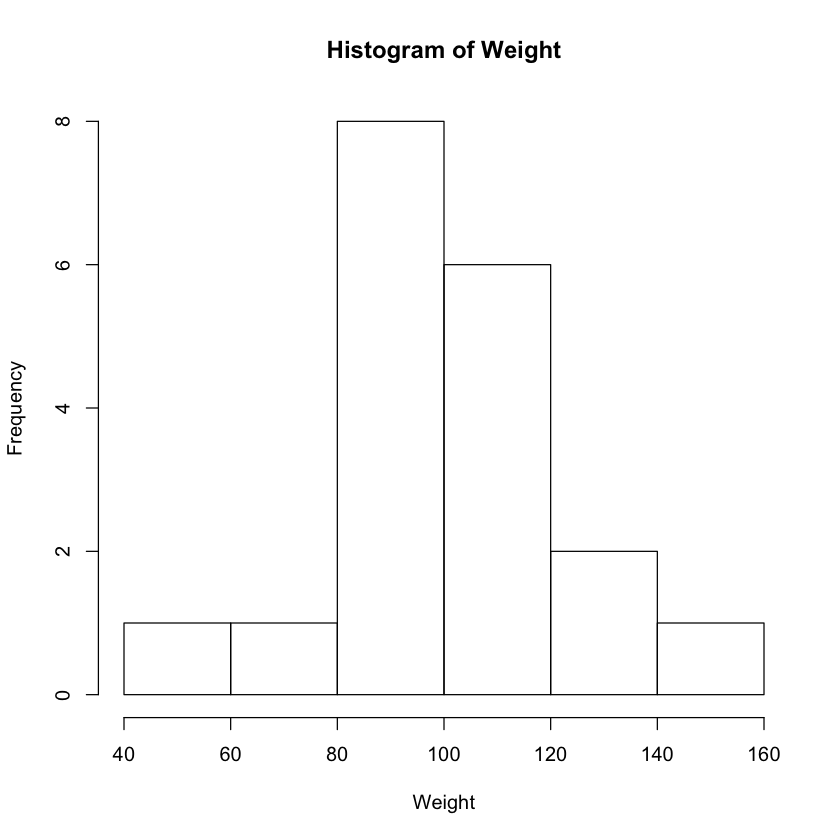

In [25]:
# Setting student$Weight to a new variable "Weight" cleans up the labeling of
# the histogram
Weight <- student$Weight
hist(Weight)

## 2.2 Visualize a single continuous variable by producing a boxplot.

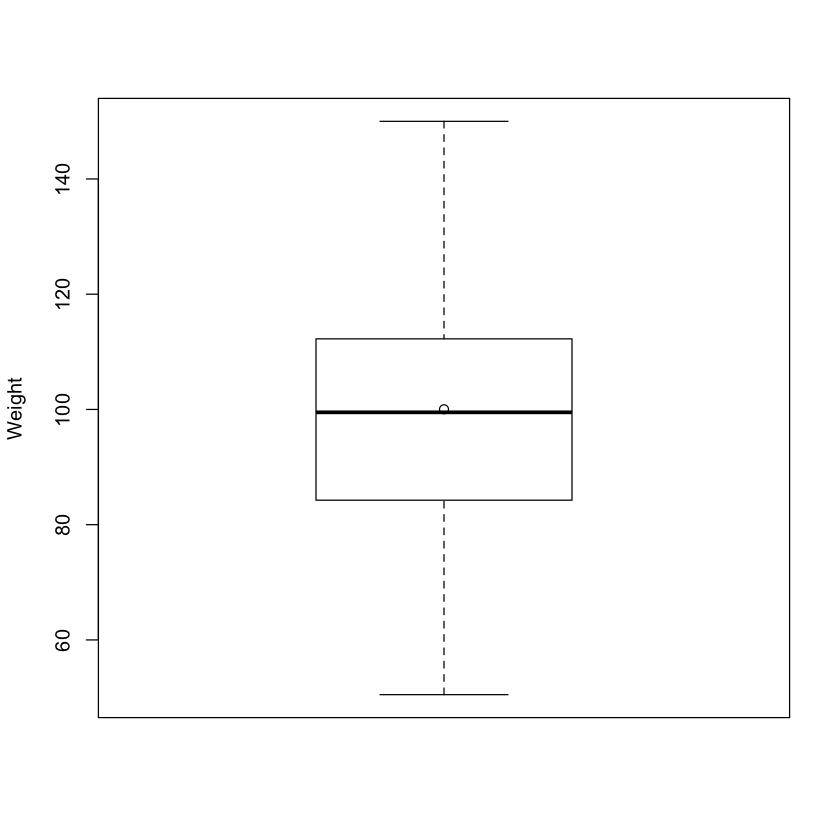

In [26]:
# points(mean(Weight)) tells R to plot the mean on the boxplot
boxplot(Weight, ylab = 'Weight')
points(mean(Weight))

## 2.3 Visualize two continuous variables by producing a scatterplot.

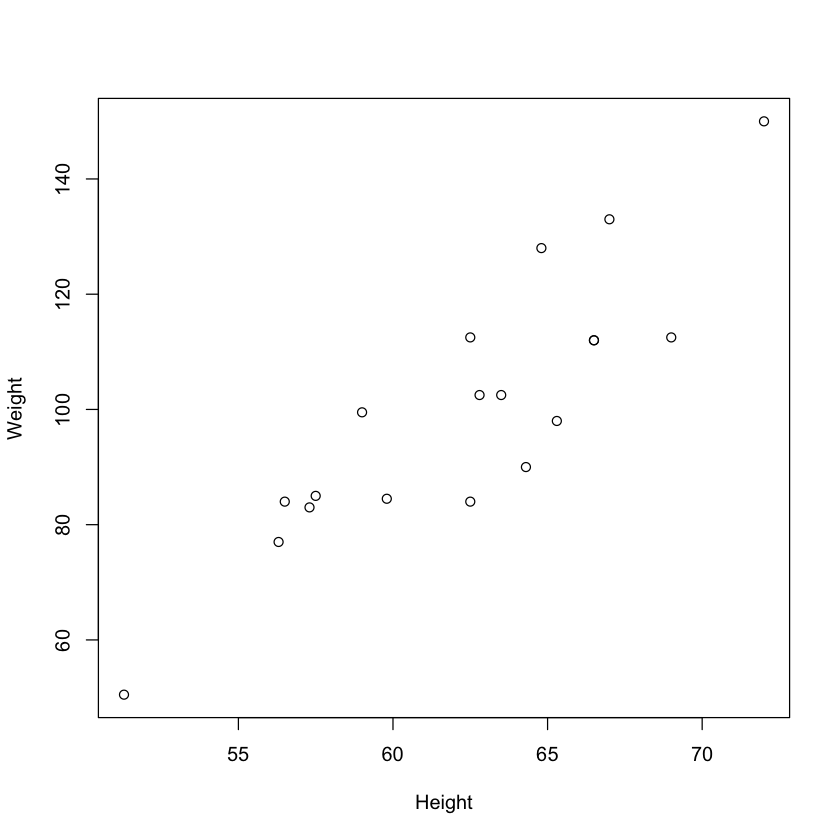

In [27]:
Height <- student$Height
# Notice here you specify the x variable, followed by the y variable
plot(Height, Weight)

## 2.4 Visualize a relationship between two continuous variables by producing a scatterplot and a plotted line of best fit.

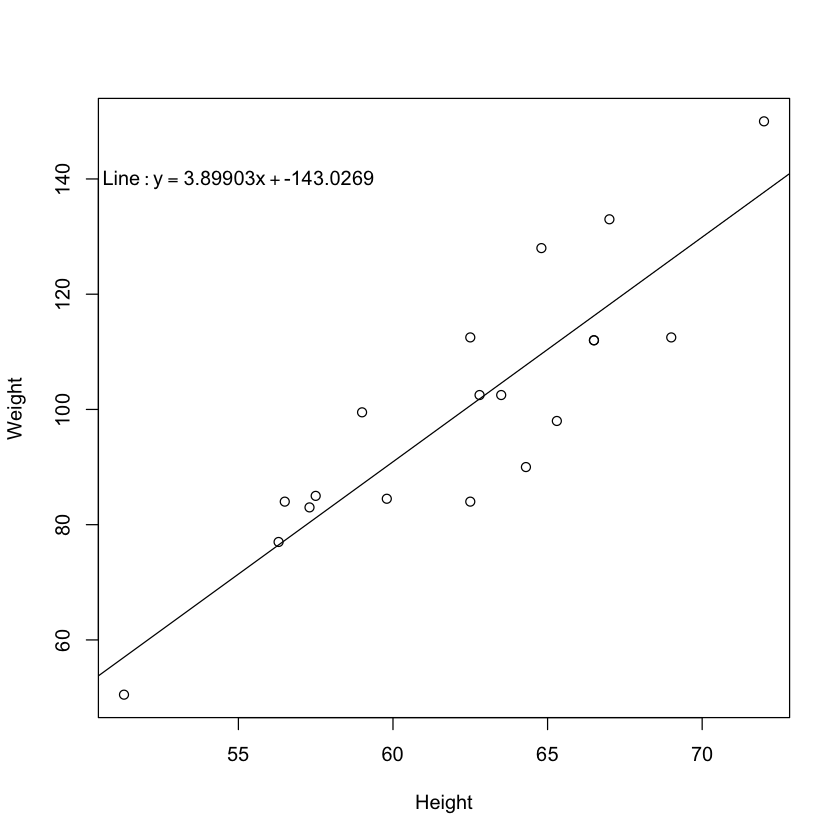

In [28]:
plot(Height, Weight)

# lm() models Weight as a function of Height and returns the parameters
# of the line of best fit
model <- lm(Weight ~ Height)
coeff <- coef(model)
intercept <- as.matrix(coeff[1])[1]
slope <- as.matrix(coeff[2])[1]

# abline() prints the line of best fit
abline(lm(Weight ~ Height))

# text() prints the equation of the line of best fit, with the first
# two arguments specifying the x and y location, respectively, of where
# the text should be printed on the graph
text(55, 140, bquote(Line: y == .(slope) * x + .(intercept)))

## 2.5 Visualize a categorical variable by producing a bar chart.

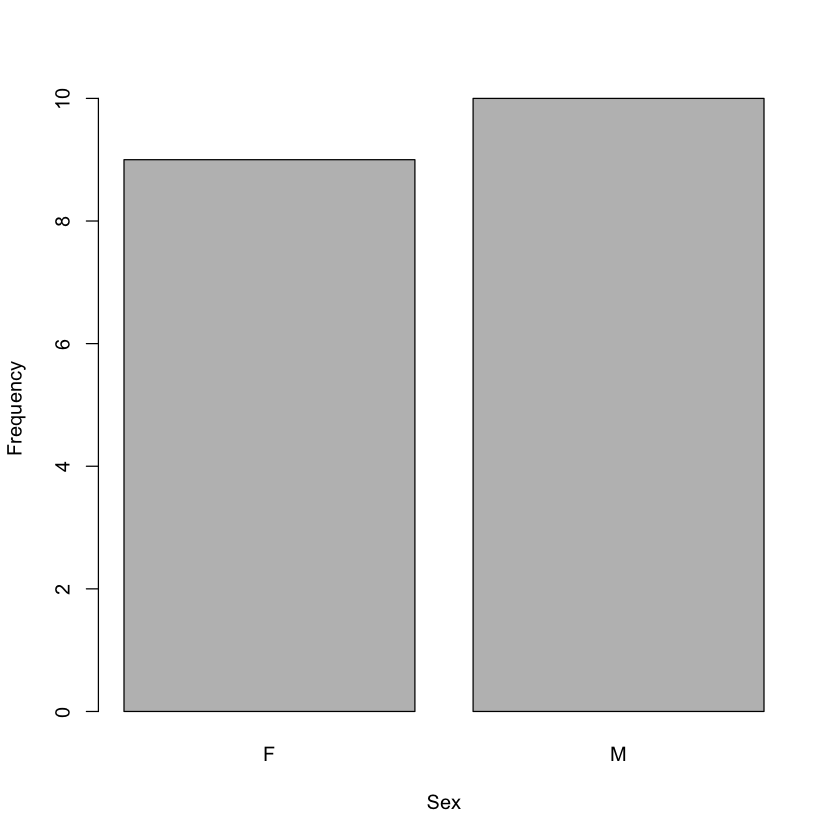

In [29]:
counts <- table(student$Sex)

# beside = TRUE indicates to print the bars side by side instead of on top of
# each other
# names.arg indicates which names to use to label the bars
barplot(counts, beside = TRUE, ylab = "Frequency", xlab = "Sex",
        names.arg = names(counts))

## 2.6 Visualize a continuous variable, grouped by a categorical variable, using side-by-side boxplots.

### a) Simple side-by-side boxplot without color.

In [30]:
# Subset dat set to return only female weights, and then only male weights
Female_Weight <- student[which(student$Sex == 'F'), "Weight"]
Male_Weight <- student[which(student$Sex == 'M'), "Weight"]

In [31]:
# Find the mean of both arrays
means <- c(mean(Female_Weight), mean(Male_Weight))

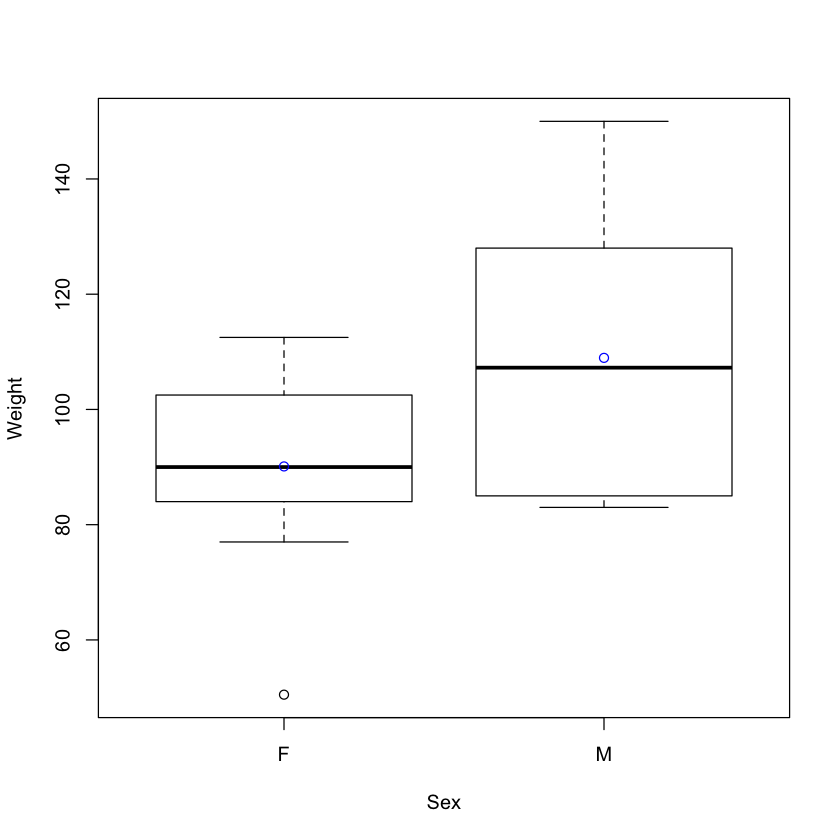

In [32]:
# Syntax indicates Weight as a function of Sex
boxplot(student$Weight ~ student$Sex, ylab = "Weight", xlab = "Sex")

# Plot means on boxplots in blue
points(means, col = 'blue')

### b) More advanced side-by-side boxplot with color.

In [33]:
# call the ggplot2 package
library(ggplot2)

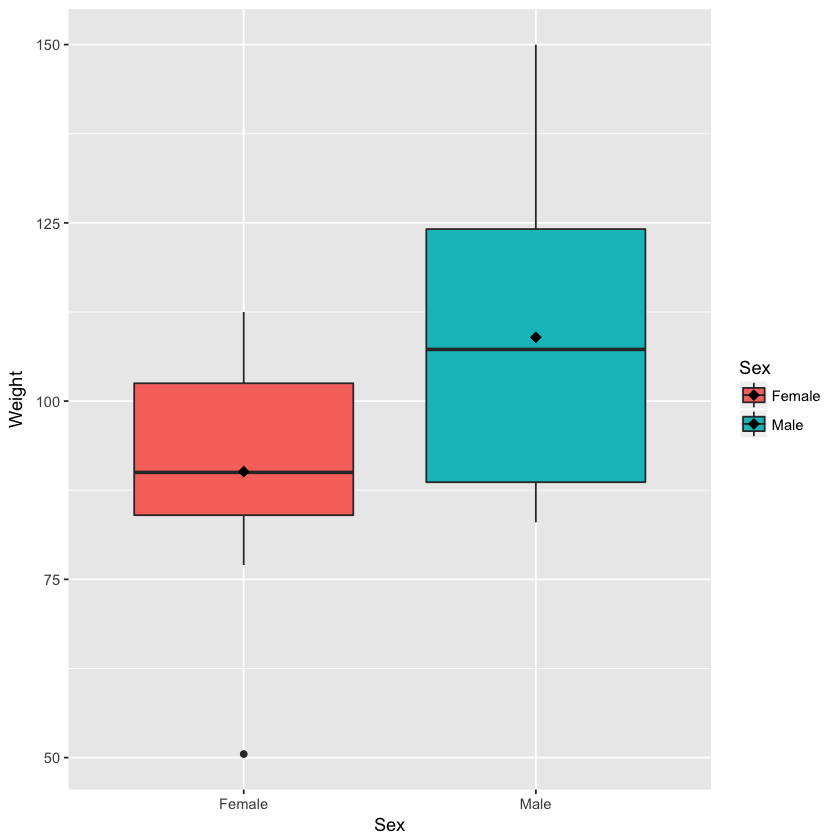

In [34]:
student$Sex <- factor(student$Sex, levels = c("F", "M"),
                      labels = c("Female", "Male"))

ggplot(data = student, aes(x = Sex, y = Weight, fill = Sex)) +
geom_boxplot() + stat_summary(fun.y = mean, color = "black", geom = 'point',
                              shape = 18, size = 3)

# 3 Basic Data Wrangling and Manipulation

## 3.1 Create a new variable in a data set as a function of existing variables in the data set.

In [35]:
# Notice here how you can create the BMI column in the data set just by
# naming it
student$BMI <- student$Weight / (student$Height) ** 2 * 703
head(student, n = 5)

Name,Sex,Age,Height,Weight,BMI
Alfred,Male,14,69.0,112.5,16.61153
Alice,Female,13,56.5,84.0,18.49855
Barbara,Female,13,65.3,98.0,16.15679
Carol,Female,14,62.8,102.5,18.27090
Henry,Male,14,63.5,102.5,17.87030


## 3.2 Create a new variable in a data set using if/else logic of existing variables in the data set.

In [36]:
# Notice the use of the ifelse() function for a single condition
student$BMI_Class <- ifelse(student$BMI < 19.0, "Underweight", "Healthy")
head(student, n = 5)

Name,Sex,Age,Height,Weight,BMI,BMI_Class
Alfred,Male,14,69.0,112.5,16.61153,Underweight
Alice,Female,13,56.5,84.0,18.49855,Underweight
Barbara,Female,13,65.3,98.0,16.15679,Underweight
Carol,Female,14,62.8,102.5,18.27090,Underweight
Henry,Male,14,63.5,102.5,17.87030,Underweight


## 3.3 Create a new variable in a data set using mathematical functions applied to existing variables in the data set.

In [37]:
student$LogWeight <- log(student$Weight)
student$ExpAge <- exp(student$Age)
student$SqrtHeight <- sqrt(student$Height)
student$BMI_Neg <- ifelse(student$BMI < 19.0, -student$BMI, student$BMI)
student$BMI_Pos <- abs(student$BMI_Neg)

# Create a boolean variable
student$BMI_Check <- (student$BMI == student$BMI_Pos)
head(student, n = 5)

Name,Sex,Age,Height,Weight,BMI,BMI_Class,LogWeight,ExpAge,SqrtHeight,BMI_Neg,BMI_Pos,BMI_Check
Alfred,Male,14,69.0,112.5,16.61153,Underweight,4.722953,1202604.3,8.306624,-16.61153,16.61153,TRUE
Alice,Female,13,56.5,84.0,18.49855,Underweight,4.430817,442413.4,7.516648,-18.49855,18.49855,TRUE
Barbara,Female,13,65.3,98.0,16.15679,Underweight,4.584967,442413.4,8.080842,-16.15679,16.15679,TRUE
Carol,Female,14,62.8,102.5,18.27090,Underweight,4.629863,1202604.3,7.924645,-18.27090,18.27090,TRUE
Henry,Male,14,63.5,102.5,17.87030,Underweight,4.629863,1202604.3,7.968689,-17.87030,17.87030,TRUE


## 3.4 Drop variables from a data set.

In [38]:
# -c() function tells R not to select the columns listed
student <- subset(student, select = -c(LogWeight, ExpAge, SqrtHeight,
                                       BMI_Neg, BMI_Pos, BMI_Check))
head(student, n = 5)

Name,Sex,Age,Height,Weight,BMI,BMI_Class
Alfred,Male,14,69.0,112.5,16.61153,Underweight
Alice,Female,13,56.5,84.0,18.49855,Underweight
Barbara,Female,13,65.3,98.0,16.15679,Underweight
Carol,Female,14,62.8,102.5,18.27090,Underweight
Henry,Male,14,63.5,102.5,17.87030,Underweight


## 3.5 Sort a data set by a variable.

### a) Sort data set by a continuous variable.

In [39]:
student <- student[order(student$Age), ]
# Notice that R uses a stable sorting algorithm by default
head(student, n = 5)

,Name,Sex,Age,Height,Weight,BMI,BMI_Class
11,Joyce,Female,11,51.3,50.5,13.49000,Underweight
18,Thomas,Male,11,57.5,85.0,18.07335,Underweight
6,James,Male,12,57.3,83.0,17.77150,Underweight
7,Jane,Female,12,59.8,84.5,16.61153,Underweight
10,John,Male,12,59.0,99.5,20.09437,Healthy


### b) Sort data set by a categorical variable.

In [40]:
student <- student[order(student$Sex), ]
# Notice that the data is now sorted first by Sex and then within Sex by Age
head(student, n = 5)

,Name,Sex,Age,Height,Weight,BMI,BMI_Class
11,Joyce,Female,11,51.3,50.5,13.49000,Underweight
7,Jane,Female,12,59.8,84.5,16.61153,Underweight
13,Louise,Female,12,56.3,77.0,17.07770,Underweight
2,Alice,Female,13,56.5,84.0,18.49855,Underweight
3,Barbara,Female,13,65.3,98.0,16.15679,Underweight


## 3.6 Compute descriptive statistics of continuous variables, grouped by a categorical variable.

In [41]:
# Notice the syntax of Age, Height, Weight, and BMI as a function of Sex
aggregate(cbind(Age, Height, Weight, BMI) ~ Sex, student, mean)

Sex,Age,Height,Weight,BMI
Female,13.22222,60.58889,90.11111,17.05104
Male,13.40000,63.91000,108.95000,18.59424


## 3.7 Add a new row to the bottom of a data set.

In [42]:
# Look at the tail of the data currently
tail(student, n = 5)

,Name,Sex,Age,Height,Weight,BMI,BMI_Class
1,Alfred,Male,14,69.0,112.5,16.61153,Underweight
5,Henry,Male,14,63.5,102.5,17.87030,Underweight
17,Ronald,Male,15,67.0,133.0,20.82847,Healthy
19,William,Male,15,66.5,112.0,17.80451,Underweight
15,Philip,Male,16,72.0,150.0,20.34144,Healthy


In [43]:
# rbind.data.frame() function binds two data frames together by rows
student <- rbind.data.frame(student, data.frame(Name = 'Jane', Sex = 'F',
                                                Age = 14, Height = 56.3,
                                                Weight = 77.0,
                                                BMI = 17.077695,
                                                BMI_Class = 'Underweight'))
tail(student, n = 5)

,Name,Sex,Age,Height,Weight,BMI,BMI_Class
5,Henry,Male,14,63.5,102.5,17.87030,Underweight
17,Ronald,Male,15,67.0,133.0,20.82847,Healthy
19,William,Male,15,66.5,112.0,17.80451,Underweight
15,Philip,Male,16,72.0,150.0,20.34144,Healthy
110,Jane,F,14,56.3,77.0,17.07769,Underweight


## 3.8 Create a user-defined function and apply it to a variable in the data set to create a new variable in the data set.

In [44]:
toKG <- function(lb) {
    return(0.45359237 * lb)
}

student$Weight_Kg <- toKG(student$Weight)
head(student, n = 5)

,Name,Sex,Age,Height,Weight,BMI,BMI_Class,Weight_Kg
11,Joyce,Female,11,51.3,50.5,13.49000,Underweight,22.90641
7,Jane,Female,12,59.8,84.5,16.61153,Underweight,38.32856
13,Louise,Female,12,56.3,77.0,17.07770,Underweight,34.92661
2,Alice,Female,13,56.5,84.0,18.49855,Underweight,38.10176
3,Barbara,Female,13,65.3,98.0,16.15679,Underweight,44.45205


# 4 More Advanced Data Wrangling

## 4.1 Drop observations with missing information.

In [45]:
# Notice the use of the fish data set because it has some missing
# observations
fish <- read.csv('data/fish.csv')

In [46]:
# First sort by Weight, requesting those with NA for Weight first
fish <- fish[order(fish$Weight, na.last = FALSE), ]
head(fish, n = 5)

,Species,Weight,Length1,Length2,Length3,Height,Width
14,Bream,NA,29.5,32.0,37.3,13.9129,5.0728
41,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516
73,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
146,Smelt,6.7,9.3,9.8,10.8,1.7388,1.0476
148,Smelt,7.0,10.1,10.6,11.6,1.7284,1.1484


In [47]:
new_fish <- na.omit(fish)
head(new_fish, n = 5)

,Species,Weight,Length1,Length2,Length3,Height,Width
41,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516
73,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
146,Smelt,6.7,9.3,9.8,10.8,1.7388,1.0476
148,Smelt,7.0,10.1,10.6,11.6,1.7284,1.1484
147,Smelt,7.5,10.0,10.5,11.6,1.9720,1.1600


## 4.2 Merge two data sets together on a common variable.

### a) First, select specific columns of a data set to create two smaller data sets.

In [48]:
# Notice the use of the student data set again, however, we want to reload
# it without the changes we've made previously
student <- read.csv('data/class.csv')
student1 <- subset(student, select = c(Name, Sex, Age))
head(student1, n = 5)

Name,Sex,Age
Alfred,M,14
Alice,F,13
Barbara,F,13
Carol,F,14
Henry,M,14


In [49]:
student2 <- subset(student, select = c(Name, Height, Weight))
head(student2, n = 5)

Name,Height,Weight
Alfred,69.0,112.5
Alice,56.5,84.0
Barbara,65.3,98.0
Carol,62.8,102.5
Henry,63.5,102.5


### b) Second, we want to merge two smaller data sets on the common variable.

In [50]:
new <- merge(student1, student2)
head(new, n = 5)

Name,Sex,Age,Height,Weight
Alfred,M,14,69.0,112.5
Alice,F,13,56.5,84.0
Barbara,F,13,65.3,98.0
Carol,F,14,62.8,102.5
Henry,M,14,63.5,102.5


### c) Finally, we want to check to see if the merged data set is the same as the original data set.

In [51]:
all.equal(student, new)

[1] TRUE

## 4.3 Merge two data sets together by index number only.

### a) First, select specific columns of a data set to create two smaller data sets.

In [52]:
newstudent1 <- subset(student, select = c(Name, Sex, Age))
head(newstudent1, n = 5)

Name,Sex,Age
Alfred,M,14
Alice,F,13
Barbara,F,13
Carol,F,14
Henry,M,14


In [53]:
newstudent2 <- subset(student, select = c(Height, Weight))
head(newstudent2, n = 5)

Height,Weight
69.0,112.5
56.5,84.0
65.3,98.0
62.8,102.5
63.5,102.5


### b) Second, we want to join the two smaller data sets.

In [54]:
new2 <- cbind(newstudent1, newstudent2)
head(new2)

Name,Sex,Age,Height,Weight
Alfred,M,14,69.0,112.5
Alice,F,13,56.5,84.0
Barbara,F,13,65.3,98.0
Carol,F,14,62.8,102.5
Henry,M,14,63.5,102.5
James,M,12,57.3,83.0


### c) Finally, we want to check to see if the joined data set is the same as the original data set.

In [55]:
all.equal(student, new2)

[1] TRUE

## 4.4 Create a pivot table to summarize information about a data set.

In [56]:
# Notice we are using a new data set that needs to be read into the 
# environment
price <- read.csv('data/price.csv')
head(price, n = 5)

COUNTRY,STATE,COUNTY,ACTUAL,PREDICT,PRODTYPE,PRODUCT,YEAR,QUARTER,MONTH,MONYR
U.S.A.,California,,$987.36,$692.24,FURNITURE,SOFA,1995,1,Jan,JAN95
U.S.A.,California,,"$1,782.96",$568.48,FURNITURE,SOFA,1995,1,Feb,FEB95
U.S.A.,California,,$32.64,$16.32,FURNITURE,SOFA,1995,1,Mar,MAR95
U.S.A.,California,,"$1,825.12",$756.16,FURNITURE,SOFA,1995,2,Apr,APR95
U.S.A.,California,,$750.72,$723.52,FURNITURE,SOFA,1995,2,May,MAY95


In [57]:
# call the dplyr package
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:gdata’:

    combine, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [58]:
# The following code is used to remove the "," and "$" characters from the 
# ACTUAL column so that values can be summed.
price$ACTUAL <- gsub('[$]', '', price$ACTUAL)
price$ACTUAL <- as.numeric(gsub(',', '', price$ACTUAL))
head(price, n = 5)

COUNTRY,STATE,COUNTY,ACTUAL,PREDICT,PRODTYPE,PRODUCT,YEAR,QUARTER,MONTH,MONYR
U.S.A.,California,,987.36,$692.24,FURNITURE,SOFA,1995,1,Jan,JAN95
U.S.A.,California,,1782.96,$568.48,FURNITURE,SOFA,1995,1,Feb,FEB95
U.S.A.,California,,32.64,$16.32,FURNITURE,SOFA,1995,1,Mar,MAR95
U.S.A.,California,,1825.12,$756.16,FURNITURE,SOFA,1995,2,Apr,APR95
U.S.A.,California,,750.72,$723.52,FURNITURE,SOFA,1995,2,May,MAY95


In [59]:
filtered <- group_by(price, COUNTRY, STATE, PRODTYPE, PRODUCT)
basic_sum <- summarize(filtered, REVENUE = sum(ACTUAL))
head(basic_sum, n = 5)

COUNTRY,STATE,PRODTYPE,PRODUCT,REVENUE
Canada,British Columbia,FURNITURE,BED,197706.6
Canada,British Columbia,FURNITURE,SOFA,216282.6
Canada,British Columbia,OFFICE,CHAIR,200905.2
Canada,British Columbia,OFFICE,DESK,186262.2
Canada,Ontario,FURNITURE,BED,194493.6


## 4.5 Return all unique values from a text variable.

In [60]:
print(unique(price$STATE))

 [1] California            Colorado              Florida              
 [4] Illinois              New York              North Carolina       
 [7] Texas                 Washington            Baja California Norte
[10] Campeche              Michoacan             Nuevo Leon           
[13] British Columbia      Ontario               Quebec               
[16] Saskatchewan         
16 Levels: Baja California Norte British Columbia California ... Washington


# 5 Preparation & Basic Regression

## 5.1 Pre-process a data set using principal component analysis.

In [61]:
# Notice we are using a data set that needs to be read into the environment
iris <- read.csv('data/iris.csv')
head(iris, n = 5)

SepalLength,SepalWidth,PetalLength,PetalWidth,Target
5.1,3.5,1.4,0.2,0
4.9,3.0,1.4,0.2,0
4.7,3.2,1.3,0.2,0
4.6,3.1,1.5,0.2,0
5.0,3.6,1.4,0.2,0


In [62]:
features <- subset(iris, select = -c(Target))
head(features, n = 5)

SepalLength,SepalWidth,PetalLength,PetalWidth
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2


In [63]:
pca <- prcomp(x = features, scale = TRUE)
print(pca)

Standard deviations:
[1] 1.7061120 0.9598025 0.3838662 0.1435538

Rotation:
                   PC1         PC2        PC3        PC4
SepalLength  0.5223716 -0.37231836  0.7210168  0.2619956
SepalWidth  -0.2633549 -0.92555649 -0.2420329 -0.1241348
PetalLength  0.5812540 -0.02109478 -0.1408923 -0.8011543
PetalWidth   0.5656110 -0.06541577 -0.6338014  0.5235463


## 5.2 Split data into training and testing data and export as a .csv file.

## 5.2 Split data into training and testing data and

In [64]:
# Set the sample size of the training data
smp_size <- floor(0.7 * nrow(iris))

In [65]:
# set.seed() is used to specify a seed for a random integer so that the
# results are reproducible
set.seed(29)
train_ind <- sample(seq_len(nrow(iris)), size = smp_size)

In [66]:
train <- iris[train_ind, ]
test <- iris[-train_ind, ]

In [67]:
write.csv(train, file = 'data/iris_train_R.csv')
write.csv(test, file = 'data/iris_test_R.csv')

## 5.3 Fit a logistic regression model.

In [68]:
# Notice we are using a new data set that needs to be read into the environment
tips <- read.csv('data/tips.csv')
head(tips, n = 5)

X,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [69]:
# The following code is used to determine if the individual left more
# than a 15% tip
tips$fifteen <- 0.15 * tips$total_bill
tips$greater15 <- ifelse(tips$tip > tips$fifteen, 1, 0)
head(tips, n = 5)

X,total_bill,tip,sex,smoker,day,time,size,fifteen,greater15
0,16.99,1.01,Female,No,Sun,Dinner,2,2.5485,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1.5510,1
2,21.01,3.50,Male,No,Sun,Dinner,3,3.1515,1
3,23.68,3.31,Male,No,Sun,Dinner,2,3.5520,0
4,24.59,3.61,Female,No,Sun,Dinner,4,3.6885,0


In [70]:
# Notice the syntax of greater15 as a function of total_bill
# You could fit the model of greater15 as a function of all
# other variables with "greater15 ~ ."
logreg <- glm(greater15 ~ total_bill, data = tips,
              family = "binomial" (link = 'logit'))
summary(logreg)


Call:
glm(formula = greater15 ~ total_bill, family = binomial(link = "logit"), 
    data = tips)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6757  -1.1766   0.8145   1.0145   2.0774  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.64772    0.35467   4.646 3.39e-06 ***
total_bill  -0.07248    0.01678  -4.319 1.57e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 335.48  on 243  degrees of freedom
Residual deviance: 313.74  on 242  degrees of freedom
AIC: 317.74

Number of Fisher Scoring iterations: 4


## 5.4 Fit a linear regression model.

In [71]:
# Notice the syntax of tip as function of total_bill
linreg <- lm(tip ~ total_bill, data = tips)
summary(linreg)


Call:
lm(formula = tip ~ total_bill, data = tips)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1982 -0.5652 -0.0974  0.4863  3.7434 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.920270   0.159735   5.761 2.53e-08 ***
total_bill  0.105025   0.007365  14.260  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.022 on 242 degrees of freedom
Multiple R-squared:  0.4566,	Adjusted R-squared:  0.4544 
F-statistic: 203.4 on 1 and 242 DF,  p-value: < 2.2e-16


# 6 Supervised Machine Learning

## 6.1 Fit a logistic regression model on training data and assess against testing data.

### a) Fit a logistic regression model on training data.

In [72]:
# Notice we are using new data sets that need to be read into the environment
train <- read.csv('data/tips_train.csv')
head(train)

total_bill,smoker,size,male,tip
29.80,0,6,0,4.20
15.81,1,2,1,3.16
15.53,1,2,1,3.00
18.24,0,2,1,3.76
16.21,0,3,0,2.00
13.42,1,2,1,1.58


In [73]:
test <- read.csv('data/tips_test.csv')
head(test)

total_bill,smoker,size,male,tip
20.29,1,2,1,3.21
14.48,1,2,1,2.00
13.00,1,2,0,2.00
23.10,1,3,1,4.00
28.44,1,2,1,2.56
7.25,0,1,0,1.00


In [74]:
train$fifteen <- 0.15 * train$total_bill
train$greater15 <- ifelse(train$tip > train$fifteen, 1, 0)
test$fifteen <- 0.15 * test$total_bill
test$greater15 <- ifelse(test$tip > test$fifteen, 1, 0)

In [75]:
logreg <- glm(greater15 ~ total_bill, data = train,
              family = 'binomial' (link = 'logit'))
summary(logreg)


Call:
glm(formula = greater15 ~ total_bill, family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6409  -1.1929   0.8144   1.0027   2.0381  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.64613    0.39459   4.172 3.02e-05 ***
total_bill  -0.07064    0.01849  -3.820 0.000134 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 267.61  on 194  degrees of freedom
Residual deviance: 250.58  on 193  degrees of freedom
AIC: 254.58

Number of Fisher Scoring iterations: 4


### b) Assess the model against the testing data.

In [76]:
# Prediction on testing data
predictions <- predict(logreg, test, type = 'response')
predY <- ifelse(predictions < 0.5, 0, 1)
# If the prediction probability is less than 0.5, classify this as a 0
# and othereise classify as a 1. This isn't the best method -- a better
# method would be randomly assigning a 0 or 1 when a probability of 0.5
# occurs, but this would insures that results are consistent.

In [77]:
# Determine how many were correctly classified
Results <- ifelse(predY == test$greater15, "Correct", "Wrong")
table(Results)

Results
Correct   Wrong 
     34      15 

## 6.2 Fit a linear regression model on training data and assess against testing data.

### a) Fit a linear regression model on training data.

In [78]:
# Notice we are using new data sets that need to be read into the environment
train <- read.csv('data/boston_train.csv')
head(train)

X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,Target
0.07022,0,4.05,0,0.510,6.020,47.2,3.5549,5,296,16.6,393.23,10.11,23.2
0.12757,30,4.93,0,0.428,6.393,7.8,7.0355,6,300,16.6,374.71,5.19,23.7
0.38735,0,25.65,0,0.581,5.613,95.6,1.7572,2,188,19.1,359.29,27.26,15.7
5.66637,0,18.10,0,0.740,6.219,100.0,2.0048,24,666,20.2,395.69,16.59,18.4
0.31827,0,9.90,0,0.544,5.914,83.2,3.9986,4,304,18.4,390.70,18.33,17.8
4.54192,0,18.10,0,0.770,6.398,88.0,2.5182,24,666,20.2,374.56,7.79,25.0


In [79]:
test <- read.csv('data/boston_test.csv')
head(test)

X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,Target
0.06047,0.0,2.46,0,0.4880,6.153,68.8,3.2797,3,193,17.8,387.11,13.15,29.6
0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05,33.0
0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28,18.2
0.32543,0.0,21.89,0,0.6240,6.431,98.8,1.8125,4,437,21.2,396.90,15.39,18.0
7.83932,0.0,18.10,0,0.6550,6.209,65.4,2.9634,24,666,20.2,396.90,13.22,21.4


In [80]:
# Fit a linear regression model
# The "." character tells the model to use all variables except the response
# variable (Target)
linreg <- lm(Target ~ ., data = train)
summary(linreg)


Call:
lm(formula = Target ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.6466  -2.8461  -0.5395   1.7077  26.2160 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.108196   6.504968   5.551 5.73e-08 ***
X0           -0.085634   0.042774  -2.002 0.046077 *  
X1            0.046034   0.017150   2.684 0.007626 ** 
X2            0.036413   0.076006   0.479 0.632186    
X3            3.247961   1.074138   3.024 0.002686 ** 
X4          -14.872938   4.636090  -3.208 0.001463 ** 
X5            3.576869   0.536993   6.661 1.10e-10 ***
X6           -0.008703   0.016853  -0.516 0.605890    
X7           -1.368905   0.252960  -5.412 1.18e-07 ***
X8            0.313120   0.082366   3.802 0.000170 ***
X9           -0.012882   0.004599  -2.801 0.005383 ** 
X10          -0.976900   0.170996  -5.713 2.43e-08 ***
X11           0.011326   0.003359   3.372 0.000832 ***
X12          -0.526715   0.062563  -8.419 1.08e-15 ***
---
Signif

### b) Assess the model against the testing data.

In [81]:
# Predict on testing data
prediction <- data.frame(matrix(ncol = 0, nrow = nrow(test)))
prediction$predY <- predict(linreg, newdata = test)

In [82]:
# Compute the squared difference between predicted and actual tip
prediction$sq_diff <- (prediction$predY - test$Target) ** 2

In [83]:
# Compute the mean of the squared differences (mean squared error)
# as an assessment of the model
mean_sq_error <- mean(prediction$sq_diff)
print(mean_sq_error)

[1] 17.77131


## 6.3 Fit a decision tree model on training data and assess against testing data.

### a) Fit a decision tree classification model.

#### i) Fit a decision tree classification model on training data and determine variable importance.

In [84]:
# Notice we are using new data sets that need to be read into the environment
train <- read.csv('data/breastcancer_train.csv')
head(train)

X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X21,X22,X23,X24,X25,X26,X27,X28,X29,Target
17.600,23.33,119.00,980.5,0.09289,0.20040,0.21360,0.10020,0.1696,0.07369,⋯,28.87,143.60,1437.0,0.1207,0.4785,0.5165,0.19960,0.2301,0.12240,0
14.580,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.04349,0.1739,0.05640,⋯,17.24,108.50,862.0,0.1223,0.1928,0.2492,0.09186,0.2626,0.07048,1
8.734,16.84,55.27,234.3,0.10390,0.07428,0.00000,0.00000,0.1985,0.07098,⋯,22.80,64.01,317.0,0.1460,0.1310,0.0000,0.00000,0.2445,0.08865,1
14.440,15.18,93.97,640.1,0.09970,0.10210,0.08487,0.05532,0.1724,0.06081,⋯,19.85,108.60,766.9,0.1316,0.2735,0.3103,0.15990,0.2691,0.07683,1
12.400,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,0.07102,⋯,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359,1
11.080,18.83,73.30,361.6,0.12160,0.21540,0.16890,0.06367,0.2196,0.07950,⋯,32.82,91.76,508.1,0.2184,0.9379,0.8402,0.25240,0.4154,0.14030,0


In [85]:
test <- read.csv('data/breastcancer_test.csv')
head(test)

X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X21,X22,X23,X24,X25,X26,X27,X28,X29,Target
12.21,14.09,78.78,462.0,0.08108,0.07823,0.06839,0.02534,0.1646,0.06154,⋯,19.29,87.65,529.9,0.1026,0.2431,0.3076,0.09140,0.2677,0.08824,1
8.95,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,⋯,17.07,63.34,270.0,0.1179,0.1879,0.1544,0.03846,0.1652,0.07722,1
14.25,21.72,93.63,633.0,0.09823,0.10980,0.13190,0.05598,0.1885,0.06125,⋯,30.36,116.20,799.6,0.1446,0.4238,0.5186,0.14470,0.3591,0.10140,0
19.07,24.81,128.30,1104.0,0.09081,0.21900,0.21070,0.09961,0.2310,0.06343,⋯,33.17,177.40,1651.0,0.1247,0.7444,0.7242,0.24930,0.4670,0.10380,0
12.65,18.17,82.69,485.6,0.10760,0.13340,0.08017,0.05074,0.1641,0.06854,⋯,22.15,95.29,633.7,0.1533,0.3842,0.3582,0.14070,0.3230,0.10330,1
19.53,32.47,128.00,1223.0,0.08420,0.11300,0.11450,0.06637,0.1428,0.05313,⋯,45.41,180.20,2477.0,0.1408,0.4097,0.3995,0.16250,0.2713,0.07568,0


In [86]:
# call the tree package
library(tree)

In [87]:
treeMod <- tree(Target ~ ., data = train, method = 'class')

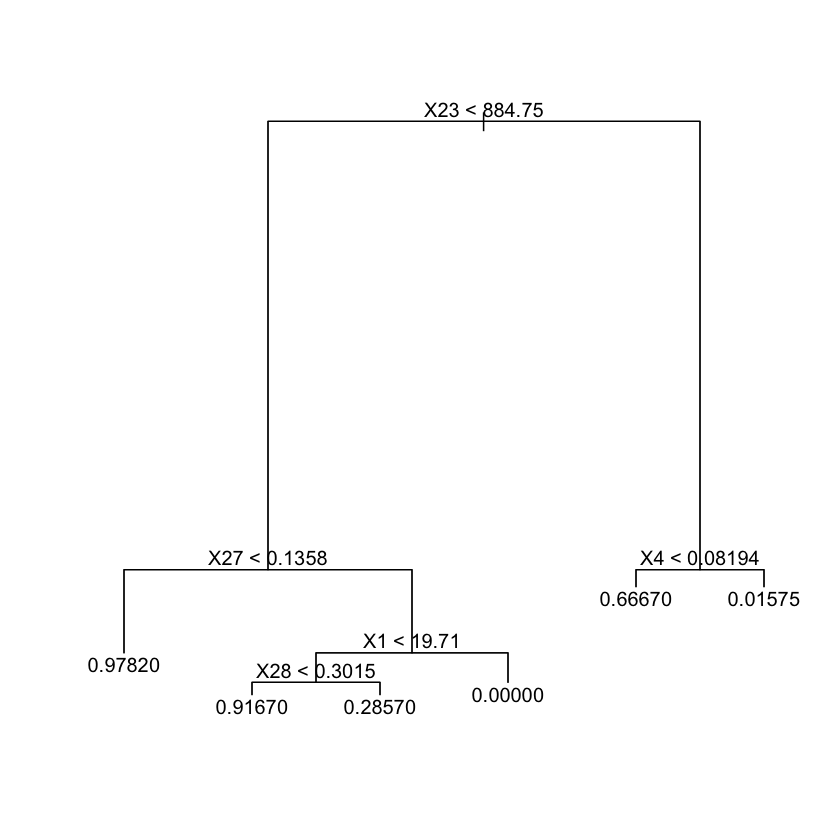

In [88]:
# Plot the decision tree
plot(treeMod)
text(treeMod)

In [89]:
# Determine variable importance
summary(treeMod)


Regression tree:
tree(formula = Target ~ ., data = train, method = "class")
Variables actually used in tree construction:
[1] "X23" "X27" "X1"  "X28" "X4" 
Number of terminal nodes:  6 
Residual mean deviance:  0.02688 = 10.54 / 392 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.97820 -0.01575  0.02183  0.00000  0.02183  0.98430 

#### ii) Assess the model against the testing data.

In [90]:
# Prediction on testing data
out <- predict(treeMod, test)
out <- unname(out)
predY <- ifelse(out < 0, 0, 1)

In [91]:
# Determine how many were correctly classified
Results <- ifelse(test$Target == predY, "Correct", "Wrong")
table(Results)

Results
Correct   Wrong 
    114      57 

### b) Fit a decision tree regression model.

#### i) Fit a decision tree regression model on training data and determine variable importance.

In [92]:
train <- read.csv('data/boston_train.csv')
head(train)

X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,Target
0.07022,0,4.05,0,0.510,6.020,47.2,3.5549,5,296,16.6,393.23,10.11,23.2
0.12757,30,4.93,0,0.428,6.393,7.8,7.0355,6,300,16.6,374.71,5.19,23.7
0.38735,0,25.65,0,0.581,5.613,95.6,1.7572,2,188,19.1,359.29,27.26,15.7
5.66637,0,18.10,0,0.740,6.219,100.0,2.0048,24,666,20.2,395.69,16.59,18.4
0.31827,0,9.90,0,0.544,5.914,83.2,3.9986,4,304,18.4,390.70,18.33,17.8
4.54192,0,18.10,0,0.770,6.398,88.0,2.5182,24,666,20.2,374.56,7.79,25.0


In [93]:
test <- read.csv('data/boston_test.csv')
head(test)

X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,Target
0.06047,0.0,2.46,0,0.4880,6.153,68.8,3.2797,3,193,17.8,387.11,13.15,29.6
0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05,33.0
0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28,18.2
0.32543,0.0,21.89,0,0.6240,6.431,98.8,1.8125,4,437,21.2,396.90,15.39,18.0
7.83932,0.0,18.10,0,0.6550,6.209,65.4,2.9634,24,666,20.2,396.90,13.22,21.4


In [94]:
treeMod <- tree(Target ~ ., data = train)

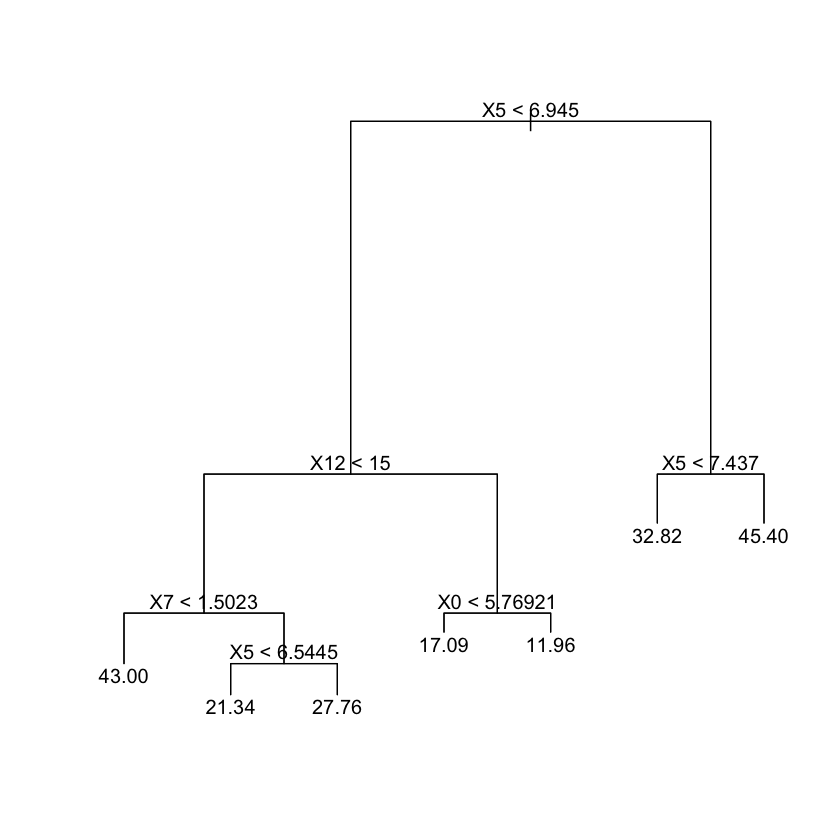

In [95]:
# Plot the decision tree
plot(treeMod)
text(treeMod)

In [96]:
# Determine variable importance
summary(treeMod)


Regression tree:
tree(formula = Target ~ ., data = train)
Variables actually used in tree construction:
[1] "X5"  "X12" "X7"  "X0" 
Number of terminal nodes:  7 
Residual mean deviance:  14.67 = 5091 / 347 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-28.0000  -1.8070   0.3264   0.0000   2.2320  10.0100 

#### ii) Assess the model against the testing data.

In [97]:
# Prediction on testing data
prediction <- data.frame(matrix(ncol = 0, nrow = nrow(test)))
prediction$predY <- predict(treeMod, newdata = test)

In [98]:
# Determine mean squared error
prediction$sq_diff <- (prediction$predY - test$Target) ** 2
mean_sq_error <- mean(prediction$sq_diff)
print(mean_sq_error)

[1] 25.12126


## 6.4 Fit a random forest model on training data and assess against testing data.

### a) Fit a random forest classification model.

#### i) Fit a random forest classification model on training data and determine variable importance.

In [99]:
train <- read.csv('data/breastcancer_train.csv')
head(train)

X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X21,X22,X23,X24,X25,X26,X27,X28,X29,Target
17.600,23.33,119.00,980.5,0.09289,0.20040,0.21360,0.10020,0.1696,0.07369,⋯,28.87,143.60,1437.0,0.1207,0.4785,0.5165,0.19960,0.2301,0.12240,0
14.580,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.04349,0.1739,0.05640,⋯,17.24,108.50,862.0,0.1223,0.1928,0.2492,0.09186,0.2626,0.07048,1
8.734,16.84,55.27,234.3,0.10390,0.07428,0.00000,0.00000,0.1985,0.07098,⋯,22.80,64.01,317.0,0.1460,0.1310,0.0000,0.00000,0.2445,0.08865,1
14.440,15.18,93.97,640.1,0.09970,0.10210,0.08487,0.05532,0.1724,0.06081,⋯,19.85,108.60,766.9,0.1316,0.2735,0.3103,0.15990,0.2691,0.07683,1
12.400,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,0.07102,⋯,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359,1
11.080,18.83,73.30,361.6,0.12160,0.21540,0.16890,0.06367,0.2196,0.07950,⋯,32.82,91.76,508.1,0.2184,0.9379,0.8402,0.25240,0.4154,0.14030,0


In [100]:
test <- read.csv('data/breastcancer_test.csv')
head(test)

X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X21,X22,X23,X24,X25,X26,X27,X28,X29,Target
12.21,14.09,78.78,462.0,0.08108,0.07823,0.06839,0.02534,0.1646,0.06154,⋯,19.29,87.65,529.9,0.1026,0.2431,0.3076,0.09140,0.2677,0.08824,1
8.95,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,⋯,17.07,63.34,270.0,0.1179,0.1879,0.1544,0.03846,0.1652,0.07722,1
14.25,21.72,93.63,633.0,0.09823,0.10980,0.13190,0.05598,0.1885,0.06125,⋯,30.36,116.20,799.6,0.1446,0.4238,0.5186,0.14470,0.3591,0.10140,0
19.07,24.81,128.30,1104.0,0.09081,0.21900,0.21070,0.09961,0.2310,0.06343,⋯,33.17,177.40,1651.0,0.1247,0.7444,0.7242,0.24930,0.4670,0.10380,0
12.65,18.17,82.69,485.6,0.10760,0.13340,0.08017,0.05074,0.1641,0.06854,⋯,22.15,95.29,633.7,0.1533,0.3842,0.3582,0.14070,0.3230,0.10330,1
19.53,32.47,128.00,1223.0,0.08420,0.11300,0.11450,0.06637,0.1428,0.05313,⋯,45.41,180.20,2477.0,0.1408,0.4097,0.3995,0.16250,0.2713,0.07568,0


In [101]:
# call the randomForest package
library(randomForest)
set.seed(29)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:dplyr’:

    combine

The following object is masked from ‘package:ggplot2’:

    margin

The following object is masked from ‘package:gdata’:

    combine



In [102]:
# as.factor() since classification model
rfMod <- randomForest(as.factor(Target) ~ ., data = train)

In [103]:
# Determine variable importance
var_import <- importance(rfMod)
var_import <- data.frame(sort(var_import, decreasing = TRUE,
                              index.return = TRUE))
var_import$MeanDecreaseGini <- var_import$x
var_import$X <- var_import$ix - 1
var_import <- subset(var_import, select = -c(ix, x))
head(var_import, n = 5)

MeanDecreaseGini,X
22.88452,27
21.64371,7
21.56885,22
20.13103,23
18.90989,20


#### ii) Assess the model against the testing data.

In [104]:
# Prediction on testing data
predY <- predict(rfMod, test)

In [105]:
# Determine how many were correctly classified
Results <- ifelse(test$Target == predY, "Correct", "Wrong")
table(Results)

Results
Correct   Wrong 
    166       5 

### b) Fit a random forest regression model.

#### i) Fit a random forest regression model on training data and determine variable importance.

In [106]:
train <- read.csv('data/boston_train.csv')
head(train)

X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,Target
0.07022,0,4.05,0,0.510,6.020,47.2,3.5549,5,296,16.6,393.23,10.11,23.2
0.12757,30,4.93,0,0.428,6.393,7.8,7.0355,6,300,16.6,374.71,5.19,23.7
0.38735,0,25.65,0,0.581,5.613,95.6,1.7572,2,188,19.1,359.29,27.26,15.7
5.66637,0,18.10,0,0.740,6.219,100.0,2.0048,24,666,20.2,395.69,16.59,18.4
0.31827,0,9.90,0,0.544,5.914,83.2,3.9986,4,304,18.4,390.70,18.33,17.8
4.54192,0,18.10,0,0.770,6.398,88.0,2.5182,24,666,20.2,374.56,7.79,25.0


In [107]:
test <- read.csv('data/boston_test.csv')
head(test)

X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,Target
0.06047,0.0,2.46,0,0.4880,6.153,68.8,3.2797,3,193,17.8,387.11,13.15,29.6
0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05,33.0
0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28,18.2
0.32543,0.0,21.89,0,0.6240,6.431,98.8,1.8125,4,437,21.2,396.90,15.39,18.0
7.83932,0.0,18.10,0,0.6550,6.209,65.4,2.9634,24,666,20.2,396.90,13.22,21.4


In [108]:
# call the randomForest package
library(randomForest)
set.seed(29)

In [109]:
rfMod <- randomForest(Target ~ ., data = train)

In [110]:
# Determine variable importance
var_import <- importance(rfMod)
var_import <- data.frame(sort(var_import, decreasing = TRUE, 
                              index.return = TRUE))
var_import$MeanDecreaseGini <- var_import$x 
var_import$X <- var_import$ix - 1
var_import <- subset(var_import, select = -c(ix, x))
head(var_import, n = 5)

MeanDecreaseGini,X
8662.298,12
8451.836,5
2147.288,0
2105.072,7
1915.570,2


#### ii) Assess the model against the testing data.

In [111]:
# Prediction on testing data
prediction <- data.frame(matrix(ncol = 0, nrow = nrow(test)))
prediction$predY <- predict(rfMod, newdata = test)

In [112]:
# Determine mean squared error
prediction$sq_diff <- (prediction$predY - test$Target) ** 2
mean_sq_error <- mean(prediction$sq_diff)
print(mean_sq_error)

[1] 9.028163


## 6.5 Fit a gradient boosting model on training data and assess against testing data.

### a) Fit a gradient boosting classification model.

#### i) Fit a gradient boosting classification model on training data and determine variable importance.

In [113]:
train <- read.csv('data/breastcancer_train.csv')
head(train)

X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X21,X22,X23,X24,X25,X26,X27,X28,X29,Target
17.600,23.33,119.00,980.5,0.09289,0.20040,0.21360,0.10020,0.1696,0.07369,⋯,28.87,143.60,1437.0,0.1207,0.4785,0.5165,0.19960,0.2301,0.12240,0
14.580,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.04349,0.1739,0.05640,⋯,17.24,108.50,862.0,0.1223,0.1928,0.2492,0.09186,0.2626,0.07048,1
8.734,16.84,55.27,234.3,0.10390,0.07428,0.00000,0.00000,0.1985,0.07098,⋯,22.80,64.01,317.0,0.1460,0.1310,0.0000,0.00000,0.2445,0.08865,1
14.440,15.18,93.97,640.1,0.09970,0.10210,0.08487,0.05532,0.1724,0.06081,⋯,19.85,108.60,766.9,0.1316,0.2735,0.3103,0.15990,0.2691,0.07683,1
12.400,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,0.07102,⋯,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359,1
11.080,18.83,73.30,361.6,0.12160,0.21540,0.16890,0.06367,0.2196,0.07950,⋯,32.82,91.76,508.1,0.2184,0.9379,0.8402,0.25240,0.4154,0.14030,0


In [114]:
test <- read.csv('data/breastcancer_test.csv')
head(test)

X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X21,X22,X23,X24,X25,X26,X27,X28,X29,Target
12.21,14.09,78.78,462.0,0.08108,0.07823,0.06839,0.02534,0.1646,0.06154,⋯,19.29,87.65,529.9,0.1026,0.2431,0.3076,0.09140,0.2677,0.08824,1
8.95,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,⋯,17.07,63.34,270.0,0.1179,0.1879,0.1544,0.03846,0.1652,0.07722,1
14.25,21.72,93.63,633.0,0.09823,0.10980,0.13190,0.05598,0.1885,0.06125,⋯,30.36,116.20,799.6,0.1446,0.4238,0.5186,0.14470,0.3591,0.10140,0
19.07,24.81,128.30,1104.0,0.09081,0.21900,0.21070,0.09961,0.2310,0.06343,⋯,33.17,177.40,1651.0,0.1247,0.7444,0.7242,0.24930,0.4670,0.10380,0
12.65,18.17,82.69,485.6,0.10760,0.13340,0.08017,0.05074,0.1641,0.06854,⋯,22.15,95.29,633.7,0.1533,0.3842,0.3582,0.14070,0.3230,0.10330,1
19.53,32.47,128.00,1223.0,0.08420,0.11300,0.11450,0.06637,0.1428,0.05313,⋯,45.41,180.20,2477.0,0.1408,0.4097,0.3995,0.16250,0.2713,0.07568,0


In [115]:
# call the gbm package
library(gbm)
set.seed(29)

Loading required package: survival
Loading required package: lattice
Loading required package: splines
Loading required package: parallel
Loaded gbm 2.1.3


In [116]:
# distribution = "bernoulli" is appropriate when there are only 2 
# unique values
# n.trees = total number of trees to fit which is analogous to the number 
# of iterations
# shrinkage = learning rate or step-size reduction, whereas a lower 
# learning rate requires more iterations
gbMod <- gbm(Target ~ ., distribution = "bernoulli", data = train, 
             n.trees = 2500, shrinkage = .01)

,var,rel.inf
X27,X27,27.50103
X7,X7,20.68575
X23,X23,19.49976
X22,X22,15.46766
X13,X13,3.46162


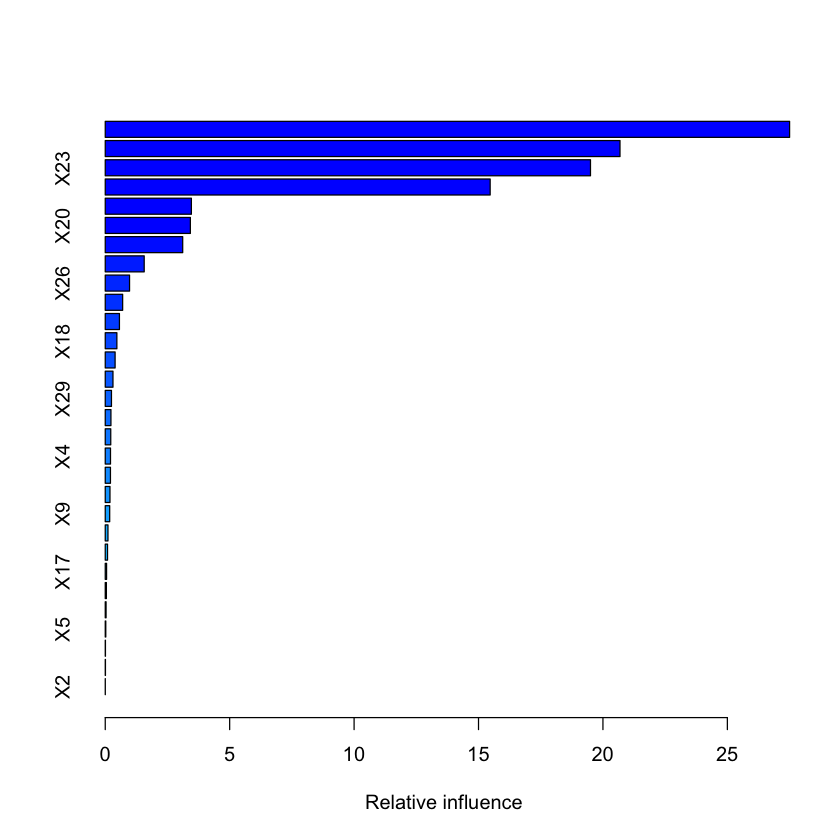

In [117]:
# Determine variable importance
var_import <- summary(gbMod)
head(var_import, n = 5)

#### ii) Assess the model against the testing data.

In [118]:
# Prediction on testing data
out <- predict(object = gbMod, newdata = test, 
               type = "response", n.trees = 2500)

In [119]:
predY <- ifelse(out < 0.5, 0, 1)

# Determine how many were correctly classified
Results <- ifelse(test$Target == predY, "Correct", "Wrong")
table(Results)

Results
Correct   Wrong 
    167       4 

### b) Fit a gradient boosting regression model.

#### i) Fit a gradient boosting regression model on training data and determine variable importance.

In [120]:
train <- read.csv('data/boston_train.csv')
head(train)

X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,Target
0.07022,0,4.05,0,0.510,6.020,47.2,3.5549,5,296,16.6,393.23,10.11,23.2
0.12757,30,4.93,0,0.428,6.393,7.8,7.0355,6,300,16.6,374.71,5.19,23.7
0.38735,0,25.65,0,0.581,5.613,95.6,1.7572,2,188,19.1,359.29,27.26,15.7
5.66637,0,18.10,0,0.740,6.219,100.0,2.0048,24,666,20.2,395.69,16.59,18.4
0.31827,0,9.90,0,0.544,5.914,83.2,3.9986,4,304,18.4,390.70,18.33,17.8
4.54192,0,18.10,0,0.770,6.398,88.0,2.5182,24,666,20.2,374.56,7.79,25.0


In [121]:
test <- read.csv('data/boston_test.csv')
head(test)

X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,Target
0.06047,0.0,2.46,0,0.4880,6.153,68.8,3.2797,3,193,17.8,387.11,13.15,29.6
0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05,33.0
0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28,18.2
0.32543,0.0,21.89,0,0.6240,6.431,98.8,1.8125,4,437,21.2,396.90,15.39,18.0
7.83932,0.0,18.10,0,0.6550,6.209,65.4,2.9634,24,666,20.2,396.90,13.22,21.4


In [122]:
# call the gbm package
library(gbm)
set.seed(29)

In [123]:
gbMod <- gbm(Target ~ ., data = train, distribution = "gaussian", 
             n.trees = 2500, shrinkage = .01)

,var,rel.inf
X12,X12,41.882259
X5,X5,32.846422
X7,X7,8.298140
X0,X0,5.937391
X4,X4,2.867877


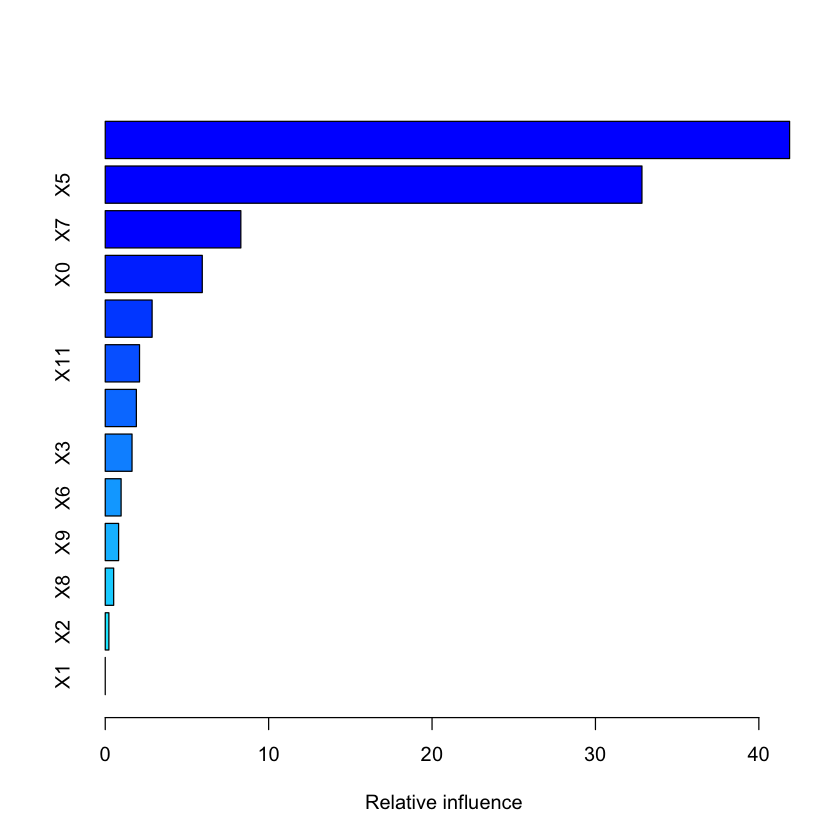

In [124]:
# Determine variable importance
var_import <- summary(gbMod)
head(var_import, n = 5)

#### ii) Assess the model against the testing data.

In [125]:
# Predict the Target in the testing data, remembeing to multiply by 50
prediction <- data.frame(matrix(ncol = 0, nrow = nrow(test)))
prediction$predY <- predict(object = gbMod, newdata = test, 
                            type = "response", n.trees = 2500)

In [126]:
# Compute mean squared error 
prediction$sq_diff <- (prediction$predY - test$Target) ** 2
mean_sq_error <- mean(prediction$sq_diff)
print(mean_sq_error)

[1] 11.88728


## 6.6 Fit an extreme gradient boosting model on training data and assess against testing data.

### a) Fit an extreme gradient boosting classification model.

#### i) Fit an extreme gradient boosting classification model on training data.

In [127]:
train <- read.csv('data/breastcancer_train.csv')
head(train)

X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X21,X22,X23,X24,X25,X26,X27,X28,X29,Target
17.600,23.33,119.00,980.5,0.09289,0.20040,0.21360,0.10020,0.1696,0.07369,⋯,28.87,143.60,1437.0,0.1207,0.4785,0.5165,0.19960,0.2301,0.12240,0
14.580,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.04349,0.1739,0.05640,⋯,17.24,108.50,862.0,0.1223,0.1928,0.2492,0.09186,0.2626,0.07048,1
8.734,16.84,55.27,234.3,0.10390,0.07428,0.00000,0.00000,0.1985,0.07098,⋯,22.80,64.01,317.0,0.1460,0.1310,0.0000,0.00000,0.2445,0.08865,1
14.440,15.18,93.97,640.1,0.09970,0.10210,0.08487,0.05532,0.1724,0.06081,⋯,19.85,108.60,766.9,0.1316,0.2735,0.3103,0.15990,0.2691,0.07683,1
12.400,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,0.07102,⋯,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359,1
11.080,18.83,73.30,361.6,0.12160,0.21540,0.16890,0.06367,0.2196,0.07950,⋯,32.82,91.76,508.1,0.2184,0.9379,0.8402,0.25240,0.4154,0.14030,0


In [128]:
test <- read.csv('data/breastcancer_test.csv')
head(test)

X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X21,X22,X23,X24,X25,X26,X27,X28,X29,Target
12.21,14.09,78.78,462.0,0.08108,0.07823,0.06839,0.02534,0.1646,0.06154,⋯,19.29,87.65,529.9,0.1026,0.2431,0.3076,0.09140,0.2677,0.08824,1
8.95,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,⋯,17.07,63.34,270.0,0.1179,0.1879,0.1544,0.03846,0.1652,0.07722,1
14.25,21.72,93.63,633.0,0.09823,0.10980,0.13190,0.05598,0.1885,0.06125,⋯,30.36,116.20,799.6,0.1446,0.4238,0.5186,0.14470,0.3591,0.10140,0
19.07,24.81,128.30,1104.0,0.09081,0.21900,0.21070,0.09961,0.2310,0.06343,⋯,33.17,177.40,1651.0,0.1247,0.7444,0.7242,0.24930,0.4670,0.10380,0
12.65,18.17,82.69,485.6,0.10760,0.13340,0.08017,0.05074,0.1641,0.06854,⋯,22.15,95.29,633.7,0.1533,0.3842,0.3582,0.14070,0.3230,0.10330,1
19.53,32.47,128.00,1223.0,0.08420,0.11300,0.11450,0.06637,0.1428,0.05313,⋯,45.41,180.20,2477.0,0.1408,0.4097,0.3995,0.16250,0.2713,0.07568,0


In [129]:
# call the xgboost package
library(xgboost)
set.seed(29)


Attaching package: ‘xgboost’

The following object is masked from ‘package:dplyr’:

    slice



In [130]:
# Fit the model
xgbMod <- xgboost(data.matrix(subset(train, select = -c(Target))), 
                 data.matrix(train$Target), max_depth = 3, nrounds = 2,
                 objective = "binary:logistic", n_estimators = 2500, 
                 shrinkage = .01)

[1]	train-error:0.037688 
[2]	train-error:0.020101 


#### ii) Assess the model against the testing data.

In [131]:
# Prediction on testing data
predictions <- predict(xgbMod, 
                       data.matrix(subset(test, 
                                          select = -c(Target))))
predY <- ifelse(predictions < 0.5, 0, 1)

In [132]:
# Determine how many were correctly classified
Results <- ifelse(test$Target == predY, "Correct", "Wrong")
table(Results)

Results
Correct   Wrong 
    165       6 

### b) Fit an extreme gradient boosting regression model.

#### i) Fit an extreme gradient boosting regression model on training data.

In [133]:
train <- read.csv('data/boston_train.csv')
head(train)

X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,Target
0.07022,0,4.05,0,0.510,6.020,47.2,3.5549,5,296,16.6,393.23,10.11,23.2
0.12757,30,4.93,0,0.428,6.393,7.8,7.0355,6,300,16.6,374.71,5.19,23.7
0.38735,0,25.65,0,0.581,5.613,95.6,1.7572,2,188,19.1,359.29,27.26,15.7
5.66637,0,18.10,0,0.740,6.219,100.0,2.0048,24,666,20.2,395.69,16.59,18.4
0.31827,0,9.90,0,0.544,5.914,83.2,3.9986,4,304,18.4,390.70,18.33,17.8
4.54192,0,18.10,0,0.770,6.398,88.0,2.5182,24,666,20.2,374.56,7.79,25.0


In [134]:
test <- read.csv('data/boston_test.csv')
head(test)

X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,Target
0.06047,0.0,2.46,0,0.4880,6.153,68.8,3.2797,3,193,17.8,387.11,13.15,29.6
0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05,33.0
0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28,18.2
0.32543,0.0,21.89,0,0.6240,6.431,98.8,1.8125,4,437,21.2,396.90,15.39,18.0
7.83932,0.0,18.10,0,0.6550,6.209,65.4,2.9634,24,666,20.2,396.90,13.22,21.4


In [135]:
# call the xgboost package
library(xgboost)
set.seed(29)

In [136]:
# Fit the model
xgbMod <- xgboost(data.matrix(subset(train, select = -c(Target))), 
                 data.matrix(train$Target), max_depth = 3, nrounds = 10,
                 n_estimators = 2500, shrinkage = .01)

[1]	train-rmse:17.131615 
[2]	train-rmse:12.419768 
[3]	train-rmse:9.116973 
[4]	train-rmse:6.777830 
[5]	train-rmse:5.182819 
[6]	train-rmse:4.113659 
[7]	train-rmse:3.403357 
[8]	train-rmse:2.955893 
[9]	train-rmse:2.677797 
[10]	train-rmse:2.485887 


#### ii) Assess the model against the testing data.

In [137]:
# Prediction on testing
prediction <- data.frame(matrix(ncol = 0, nrow = nrow(test)))
prediction$predY <- predict(xgbMod, 
                    data.matrix(subset(test, select = -c(Target))))

In [138]:
# Compute the squared difference between predicted tip and actual tip 
prediction$sq_diff <- (prediction$predY - test$Target)**2

# Compute the mean of the squared differences (mean squared error) 
# as an assessment of the model 
mean_sq_error <- mean(prediction$sq_diff)
print(mean_sq_error)

[1] 14.27491


## 6.7 Fit a support vector model on training data and assess against testing data.

### a) Fit a support vector classification model.

#### i) Fit a support vector classification model on training data.

Note: In implementation scaling should be used.

In [139]:
train <- read.csv('data/breastcancer_train.csv')
head(train)

X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X21,X22,X23,X24,X25,X26,X27,X28,X29,Target
17.600,23.33,119.00,980.5,0.09289,0.20040,0.21360,0.10020,0.1696,0.07369,⋯,28.87,143.60,1437.0,0.1207,0.4785,0.5165,0.19960,0.2301,0.12240,0
14.580,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.04349,0.1739,0.05640,⋯,17.24,108.50,862.0,0.1223,0.1928,0.2492,0.09186,0.2626,0.07048,1
8.734,16.84,55.27,234.3,0.10390,0.07428,0.00000,0.00000,0.1985,0.07098,⋯,22.80,64.01,317.0,0.1460,0.1310,0.0000,0.00000,0.2445,0.08865,1
14.440,15.18,93.97,640.1,0.09970,0.10210,0.08487,0.05532,0.1724,0.06081,⋯,19.85,108.60,766.9,0.1316,0.2735,0.3103,0.15990,0.2691,0.07683,1
12.400,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,0.07102,⋯,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359,1
11.080,18.83,73.30,361.6,0.12160,0.21540,0.16890,0.06367,0.2196,0.07950,⋯,32.82,91.76,508.1,0.2184,0.9379,0.8402,0.25240,0.4154,0.14030,0


In [140]:
test <- read.csv('data/breastcancer_test.csv')
head(test)

X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X21,X22,X23,X24,X25,X26,X27,X28,X29,Target
12.21,14.09,78.78,462.0,0.08108,0.07823,0.06839,0.02534,0.1646,0.06154,⋯,19.29,87.65,529.9,0.1026,0.2431,0.3076,0.09140,0.2677,0.08824,1
8.95,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,⋯,17.07,63.34,270.0,0.1179,0.1879,0.1544,0.03846,0.1652,0.07722,1
14.25,21.72,93.63,633.0,0.09823,0.10980,0.13190,0.05598,0.1885,0.06125,⋯,30.36,116.20,799.6,0.1446,0.4238,0.5186,0.14470,0.3591,0.10140,0
19.07,24.81,128.30,1104.0,0.09081,0.21900,0.21070,0.09961,0.2310,0.06343,⋯,33.17,177.40,1651.0,0.1247,0.7444,0.7242,0.24930,0.4670,0.10380,0
12.65,18.17,82.69,485.6,0.10760,0.13340,0.08017,0.05074,0.1641,0.06854,⋯,22.15,95.29,633.7,0.1533,0.3842,0.3582,0.14070,0.3230,0.10330,1
19.53,32.47,128.00,1223.0,0.08420,0.11300,0.11450,0.06637,0.1428,0.05313,⋯,45.41,180.20,2477.0,0.1408,0.4097,0.3995,0.16250,0.2713,0.07568,0


In [141]:
# call the e1071 package
library(e1071)

In [142]:
# Fit a support vector classification model 
svMod <- svm(Target ~ ., train, type = 'C-classification', kernel = 'linear', scale = FALSE)

#### ii) Assess the model against the testing data.

In [143]:
# Prediction on testing data
predY <- unname(predict(svMod, subset(test, select = -c(Target))))

In [144]:
# Determine how many were correctly classified
Results <- ifelse(test$Target == predY, "Correct", "Wrong")
table(Results)

Results
Correct   Wrong 
    162       9 

### b) Fit a support vector regression model.

#### i) Fit a support vector regression model on training data.

Note: In implementation scaling should be used.

In [145]:
train <- read.csv('data/boston_train.csv')
head(train)

X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,Target
0.07022,0,4.05,0,0.510,6.020,47.2,3.5549,5,296,16.6,393.23,10.11,23.2
0.12757,30,4.93,0,0.428,6.393,7.8,7.0355,6,300,16.6,374.71,5.19,23.7
0.38735,0,25.65,0,0.581,5.613,95.6,1.7572,2,188,19.1,359.29,27.26,15.7
5.66637,0,18.10,0,0.740,6.219,100.0,2.0048,24,666,20.2,395.69,16.59,18.4
0.31827,0,9.90,0,0.544,5.914,83.2,3.9986,4,304,18.4,390.70,18.33,17.8
4.54192,0,18.10,0,0.770,6.398,88.0,2.5182,24,666,20.2,374.56,7.79,25.0


In [146]:
test <- read.csv('data/boston_test.csv')
head(test)

X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,Target
0.06047,0.0,2.46,0,0.4880,6.153,68.8,3.2797,3,193,17.8,387.11,13.15,29.6
0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05,33.0
0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28,18.2
0.32543,0.0,21.89,0,0.6240,6.431,98.8,1.8125,4,437,21.2,396.90,15.39,18.0
7.83932,0.0,18.10,0,0.6550,6.209,65.4,2.9634,24,666,20.2,396.90,13.22,21.4


In [147]:
# call the e1071 package
library(e1071)

In [148]:
svMod <- svm(Target ~ ., train, scale = FALSE)

#### ii) Assess the model against the testing data.

In [149]:
# Prediction on testing data
prediction <- data.frame(matrix(ncol = 0, nrow = nrow(test)))
prediction$predY <- unname(predict(svMod, test))
prediction$sq_diff <- (prediction$predY - test$Target) ** 2
print(mean(prediction$sq_diff))

[1] 79.81455


## 6.8 Fit a neural network model on training data and assess against testing data.

### a) Fit a neural network classification model.

#### i) Fit a neural network classification model on training data.

In [150]:
# Notice we are using new data sets
train <- read.csv('data/digits_train.csv')
head(train)

X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X55,X56,X57,X58,X59,X60,X61,X62,X63,Target
0,3,15,16,8,0,0,0,0,14,⋯,0,0,2,16,16,15,12,9,0,2
0,0,1,12,8,0,0,0,0,0,⋯,0,0,0,1,14,16,11,1,0,6
0,0,12,16,16,5,0,0,0,3,⋯,0,0,0,13,10,0,0,0,0,7
0,0,3,15,13,2,0,0,0,0,⋯,0,0,0,4,16,15,2,0,0,8
0,0,7,16,16,14,0,0,0,0,⋯,0,0,0,12,16,16,6,0,0,3
0,0,14,12,12,13,3,0,0,0,⋯,0,0,1,15,15,11,3,0,0,5


In [151]:
test <- read.csv('data/digits_test.csv')
head(test)

X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X55,X56,X57,X58,X59,X60,X61,X62,X63,Target
0,0,0,11,16,8,0,0,0,0,⋯,0,0,0,0,12,16,15,0,0,6
0,0,0,4,9,0,0,0,0,0,⋯,0,0,0,0,2,16,3,0,0,4
0,0,8,16,8,0,0,0,0,0,⋯,0,0,0,8,16,15,7,0,0,3
0,0,0,8,14,0,0,0,0,0,⋯,0,0,0,0,11,14,0,0,0,4
0,1,14,16,16,11,2,0,0,0,⋯,0,0,2,13,12,15,2,0,0,8
0,0,0,12,13,5,0,0,0,0,⋯,0,0,0,0,11,16,10,0,0,1


In [152]:
trainInputs <- subset(train, select = -c(Target))
testInputs <- subset(test, select = -c(Target))

In [153]:
# call the RSNNS package
library(RSNNS)
set.seed(29)

Loading required package: Rcpp


In [154]:
trainTarget <- decodeClassLabels(train$Target)
testTarget <- decodeClassLabels(test$Target)

In [155]:
# Fit neural network regression model
nnMod <- mlp(trainInputs, trainTarget, size = c(100), maxit = 200)

#### ii) Assess the model against the testing data.

In [156]:
# Prediction on testing data 
predictions <- predict(nnMod, testInputs)

In [157]:
# Determine how many were correctly classified
confusionMatrix(testTarget, predictions)

       predictions
targets  1  2  3  4  5  6  7  8  9 10
     1  57  0  0  0  1  0  0  0  0  0
     2   1 55  0  1  0  0  0  0  1  0
     3   1  0 51  0  0  0  0  0  2  4
     4   0  0  4 49  0  0  0  2  0  4
     5   0  0  0  0 54  0  0  0  0  0
     6   0  0  0  0  0 56  2  0  0  1
     7   0  0  0  0  0  0 41  0  0  0
     8   0  2  0  0  0  0  0 49  0  0
     9   0  3  0  0  0  0  0  0 42  0
     10  0  2  0  1  1  1  0  0  1 51

### b) Fit a neural network regression model.

#### i) Fit a neural network regression model on training data.

In [158]:
train <- read.csv('data/boston_train.csv')
head(train)

X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,Target
0.07022,0,4.05,0,0.510,6.020,47.2,3.5549,5,296,16.6,393.23,10.11,23.2
0.12757,30,4.93,0,0.428,6.393,7.8,7.0355,6,300,16.6,374.71,5.19,23.7
0.38735,0,25.65,0,0.581,5.613,95.6,1.7572,2,188,19.1,359.29,27.26,15.7
5.66637,0,18.10,0,0.740,6.219,100.0,2.0048,24,666,20.2,395.69,16.59,18.4
0.31827,0,9.90,0,0.544,5.914,83.2,3.9986,4,304,18.4,390.70,18.33,17.8
4.54192,0,18.10,0,0.770,6.398,88.0,2.5182,24,666,20.2,374.56,7.79,25.0


In [159]:
test <- read.csv('data/boston_test.csv')
head(test)

X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,Target
0.06047,0.0,2.46,0,0.4880,6.153,68.8,3.2797,3,193,17.8,387.11,13.15,29.6
0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05,33.0
0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28,18.2
0.32543,0.0,21.89,0,0.6240,6.431,98.8,1.8125,4,437,21.2,396.90,15.39,18.0
7.83932,0.0,18.10,0,0.6550,6.209,65.4,2.9634,24,666,20.2,396.90,13.22,21.4


In [160]:
# call the RSNNS package
library(RSNNS)
set.seed(29)

In [161]:
# Scale input data
scaled_train <- data.frame(scale(subset(train, select = -c(Target))))
scaled_test <- data.frame(scale(subset(test, select = -c(Target))))

In [162]:
# Fit neural network regression model, dividing target by 50 for scaling
nnMod <- mlp(scaled_train, train$Target / 50, maxit = 250, size = c(100))

In [163]:
# Assess against testing data, remembering to multiply by 50
preds < data.frame(matrix(ncol = 0, nrow = nrow(test)))
preds$predY <- predict(nnMod, scaled_test)*50
preds$sq_error <- (preds$predY - test$Target)**2
print(mean(preds$sq_error))

ERROR: Error in eval(expr, envir, enclos): object 'preds' not found


# 7 Unsupervised Machine Learning

## 7.1 KMeans Clustering

In [164]:
iris <- read.csv('data/iris.csv')

In [165]:
iris$Species <- ifelse(iris$Target == 0, "Setosa", 
                      ifelse(iris$Target == 1, "Versicolor", "Virginica"))

In [166]:
features <- as.matrix(subset(iris, select = c(PetalLength, PetalWidth, 
                                              SepalLength, SepalWidth)))

In [167]:
set.seed(29)

In [168]:
kmeans <- kmeans(features, 3)

In [169]:
table(iris$Species, kmeans$cluster)

            
              1  2  3
  Setosa     50  0  0
  Versicolor  0 48  2
  Virginica   0 14 36

## 7.2 Spectral Clustering

In [170]:
# call the kernlab package
library(kernlab)


Attaching package: ‘kernlab’

The following object is masked from ‘package:ggplot2’:

    alpha



In [171]:
set.seed(29)

In [172]:
spectral <- specc(features, centers = 3, iterations = 10, nystrom.red = TRUE)

In [173]:
labels <- as.data.frame(spectral)

In [174]:
table(iris$Species, labels$spectral)

            
              1  2  3
  Setosa     50  0  0
  Versicolor  0 47  3
  Virginica   0  3 47

## 7.3 Ward Hierarchical Clustering

In [175]:
set.seed(29)

In [176]:
hclust <- hclust(dist(features), method = "ward.D2")

In [177]:
table(iris$Species, cutree(hclust, 3))

            
              1  2  3
  Setosa     50  0  0
  Versicolor  0 49  1
  Virginica   0 15 35

## 7.4 DBSCAN

In [178]:
# call the dbscan package
library(dbscan)

In [179]:
set.seed(29)

In [180]:
# eps = 0.5 is default in Python
dbscan <- dbscan(features, eps = 0.5)

In [181]:
table(iris$Species, dbscan$cluster)

            
              0  1  2
  Setosa      1 49  0
  Versicolor  6  0 44
  Virginica  10  0 40

## 7.5 Self-organized map

In [182]:
# call the kohonen package
library(kohonen)


Attaching package: ‘kohonen’

The following object is masked from ‘package:RSNNS’:

    som



In [183]:
# Seed chosen to match SAS and R results
set.seed(5)

In [184]:
fit <- som(features, mode = "online", somgrid(4, 4, "rectangular"))

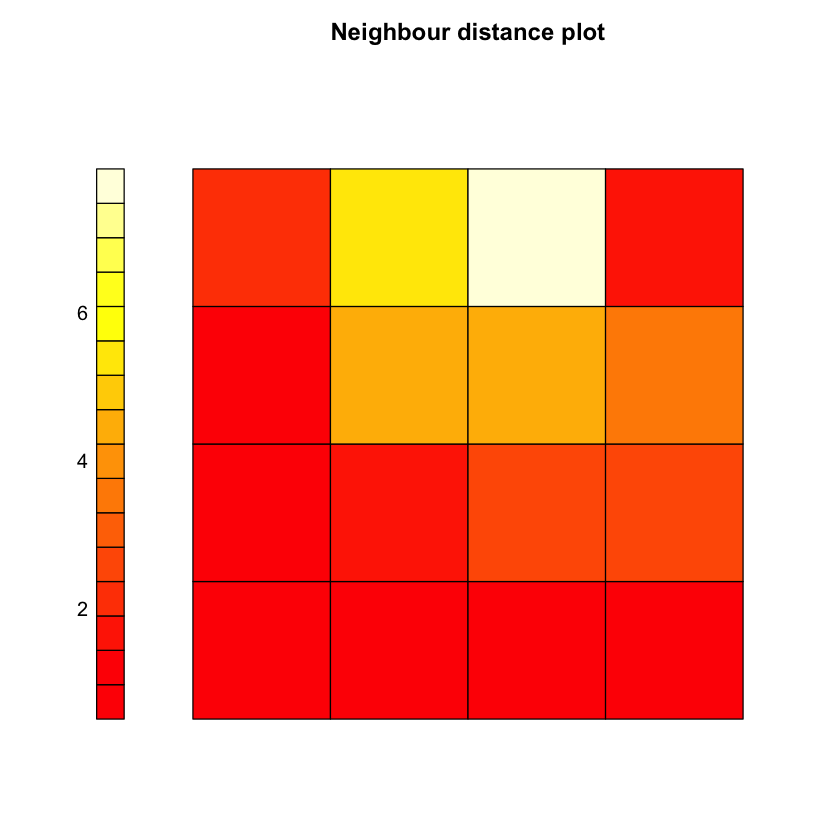

In [185]:
plot(fit, type = "dist.neighbour", shape = "straight")

# 8 Forecasting

## 8.1 Fit an ARIMA model to a timeseries.

### a) Plot the timeseries.

In [186]:
# Read in new data set
air <- read.csv('data/air.csv')

In [187]:
air_series <- air$AIR

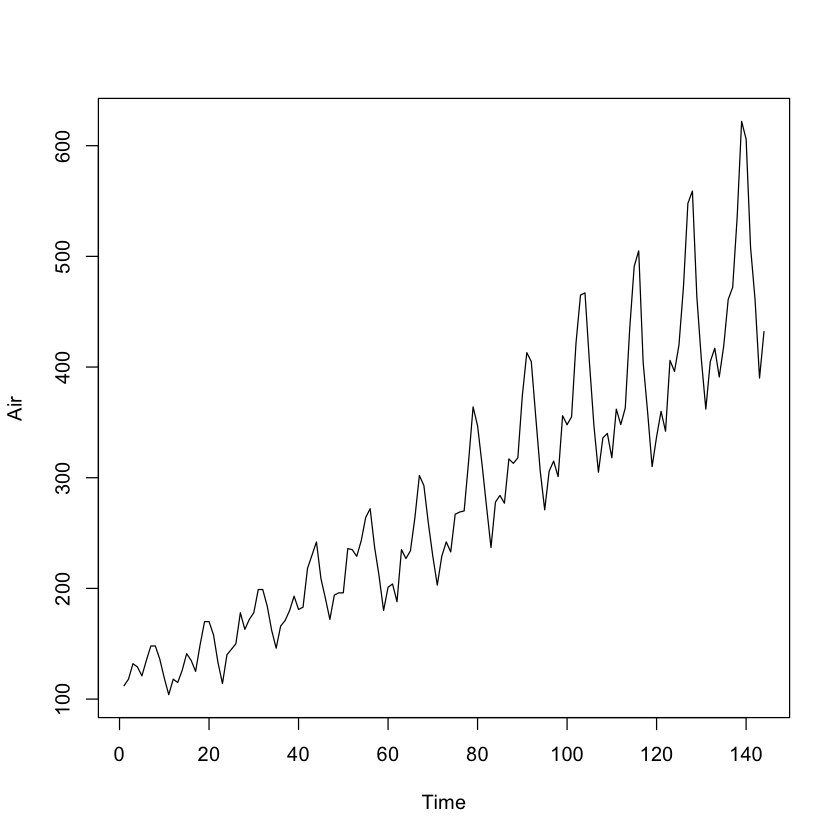

In [188]:
plot.ts(air_series, ylab = "Air")

### b) Fit an ARIMA (0, 1, 1) model and predict 2 years (24 months).

In [189]:
a_fit <- arima(air_series, order = c(0,1,1), 
               seasonal = list(order = c(0,1,1), period = 12),
               method = "ML")

In [190]:
# call the forecast package
library(forecast)

In [191]:
a_forecast <- forecast(a_fit, 24)

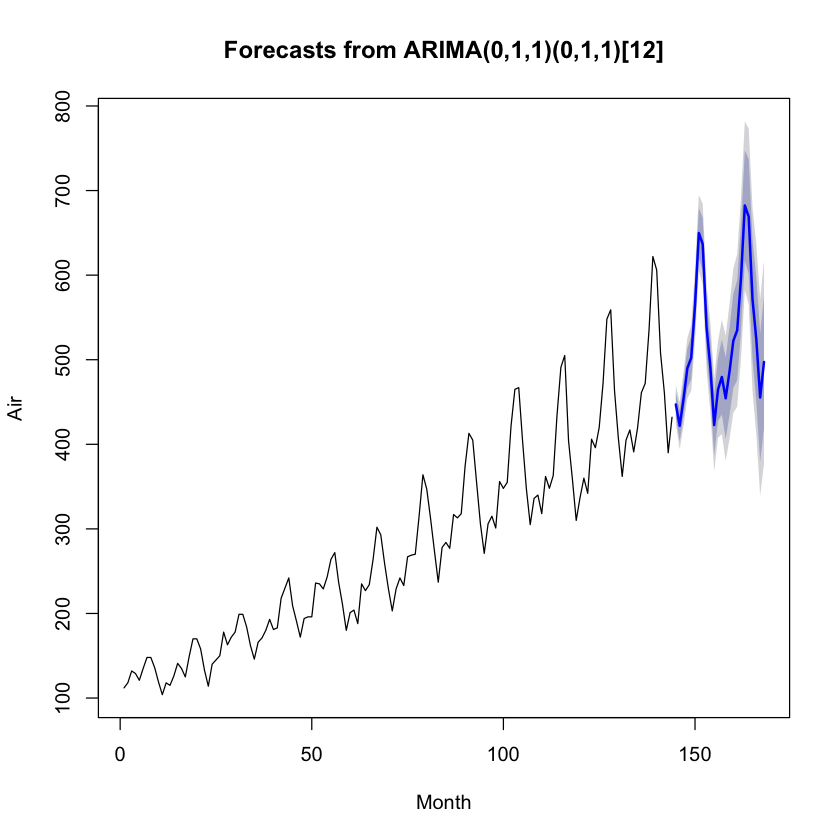

In [192]:
plot(a_forecast, xlab = "Month", ylab = "Air")

## 8.2 Fit a Simple Exponential Smoothing model to a timeseries.

### a) Plot the timeseries.

In [193]:
# Read in new data set
usecon <- read.csv('data/usecon.csv')
head(usecon, n = 5)

DATE,AIRRPMD,AIRRPMT,CHEMICAL,COAL,DURABLES,HS1FAM,HSTOTAL,NONDUR,PETROL,TOBACCO,VEHICLES
JAN71,8.439995,10.519997,3896,49780,26617,NA,NA,23314,2154,425,4367
FEB71,7.199997,8.989998,4346,47029,29829,NA,NA,25407,2250,433,5147
MAR71,8.169998,10.139999,4318,56920,31336,NA,NA,25832,2165,445,5418
APR71,9.019997,11.149994,4536,54336,30484,NA,NA,25773,2223,440,4897
MAY71,8.399994,10.839996,4454,50442,31008,NA,NA,25560,2190,458,5002


In [194]:
petrol_series <- usecon$PETROL

In [195]:
petrol <- ts(petrol_series, frequency = 12)

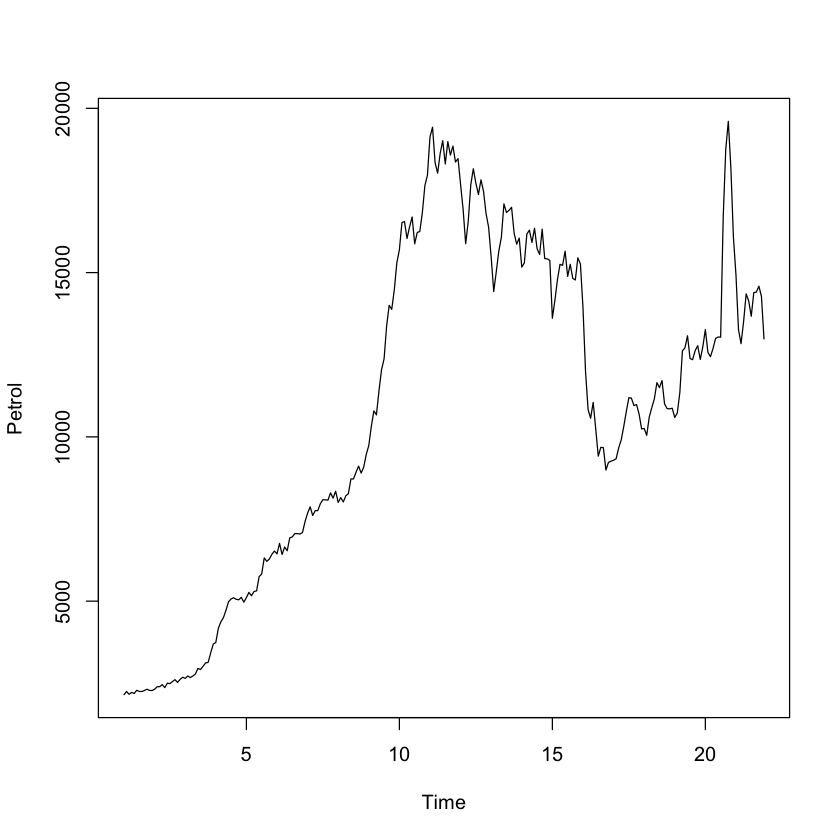

In [196]:
plot.ts(petrol, ylab = "Petrol")

### b) Fit a Simple Exponential Smoothing model, predict 2 years (24 months) out and plot predictions.

In [197]:
# call the forecast package
library(forecast)

In [198]:
ses_fit <- ses(petrol, h=24, alpha = 0.9999)

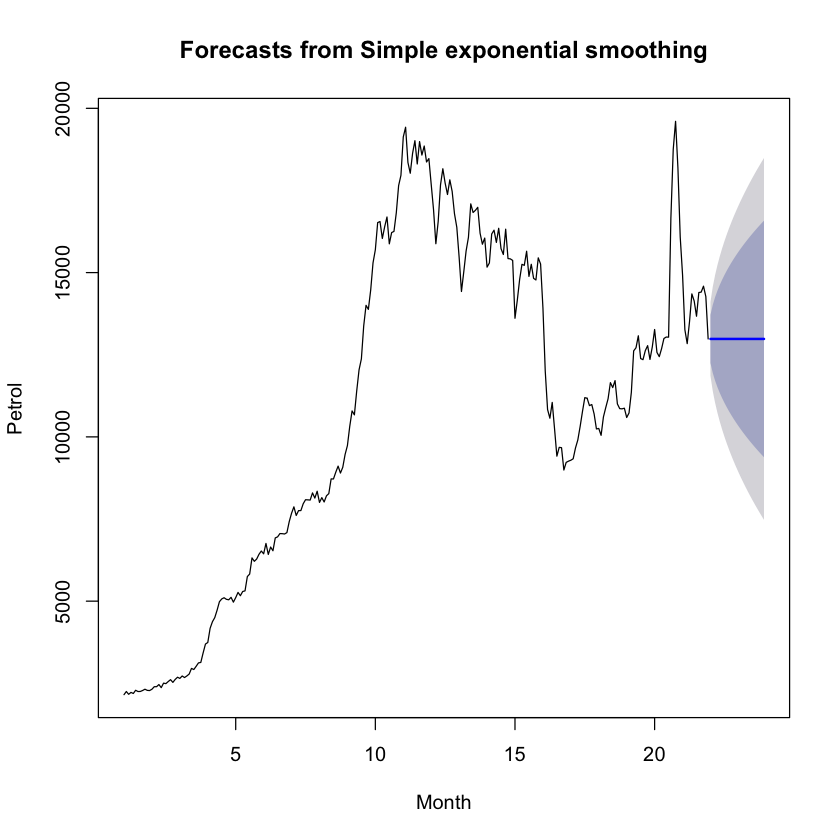

In [199]:
plot(ses_fit, xlab = "Month", ylab = "Petrol")

## 8.3 Fit a Holt-Winters model to a timeseries.

### a) Plot the timeseries.

In [200]:
vehicle_series <- usecon$VEHICLES

In [201]:
vehicle <- ts(vehicle_series, frequency = 12)

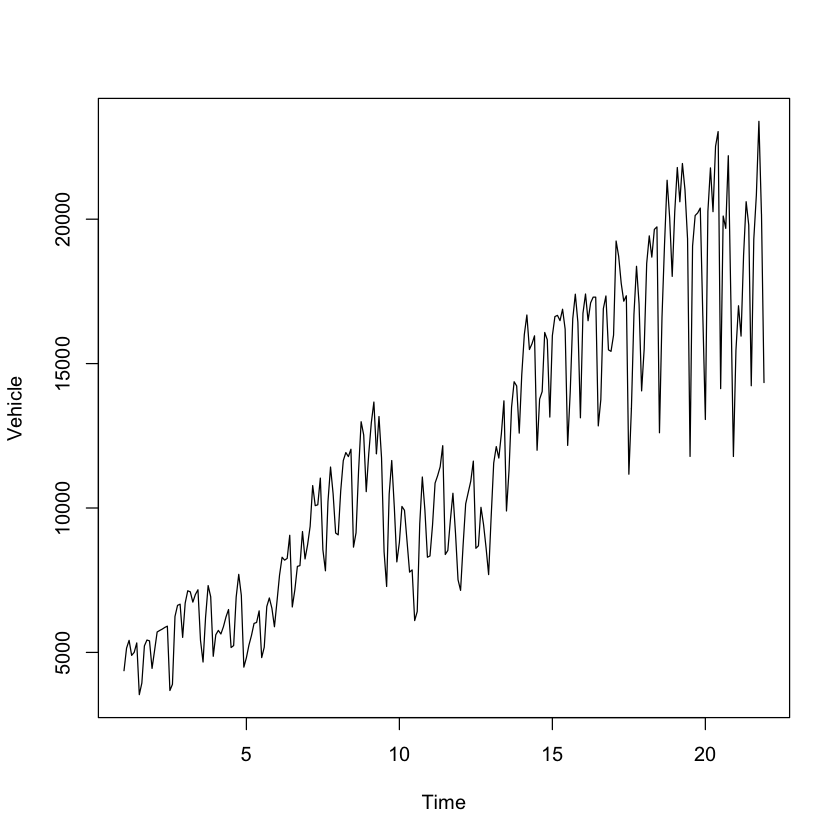

In [202]:
plot.ts(vehicle, ylab = "Vehicle")

### b) Fit a Holt-Winters additive model, predict 2 years (24 months) out and plot predictions.

In [203]:
# call the forecast package
library(forecast)

In [204]:
add_fit <- HoltWinters(vehicle, seasonal = "additive")

In [205]:
add_forecast <- forecast(add_fit, 24)

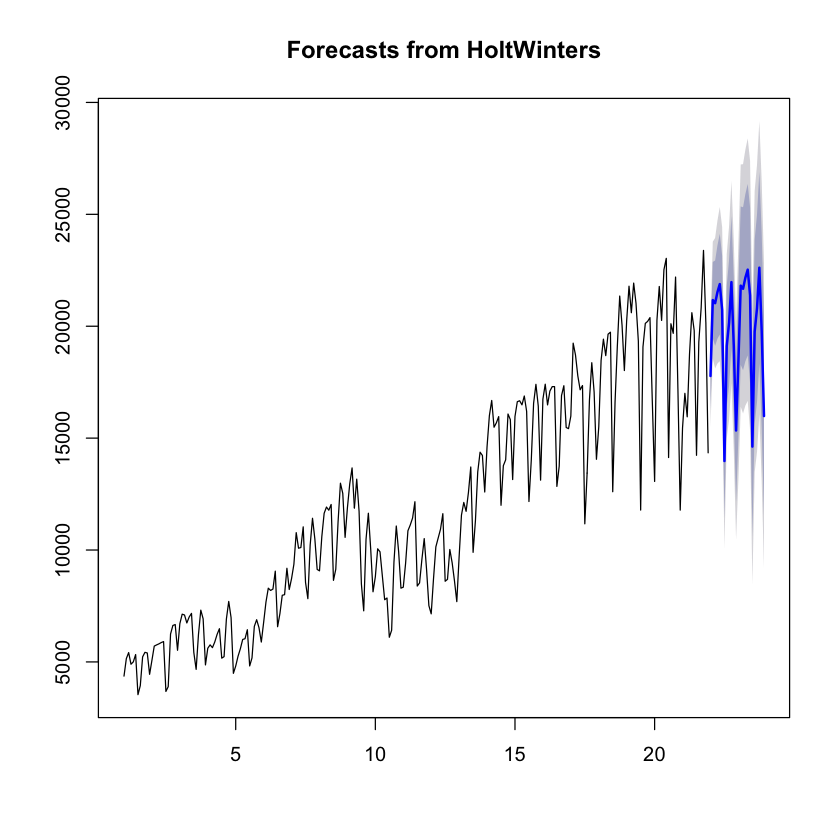

In [206]:
plot(add_forecast)

## 8.4 Fit a Facebook Prophet forecasting model to a timeseries.

In [207]:
air <- read.csv('data/air.csv')
head(air)

DATE,AIR
01/01/1949,112
02/01/1949,118
03/01/1949,132
04/01/1949,129
05/01/1949,121
06/01/1949,135


In [208]:
# call the prophet & dplyr packages
library(prophet)
library(dplyr)

In [209]:
air_df <- data.frame(matrix(ncol = 0, nrow = nrow(air)))

In [210]:
air_df$ds <- as.Date(air$DATE, format = "%m/%d/%Y")
air_df$y <- air$AIR

In [211]:
m <- prophet(air_df, yearly.seasonality = TRUE, weekly.seasonality = FALSE)

trying deprecated constructor; please alert package maintainer


Initial log joint probability = -2.46502
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


In [212]:
future <- make_future_dataframe(m, periods = 24, freq = "month")

In [213]:
forecast <- predict(m, future)

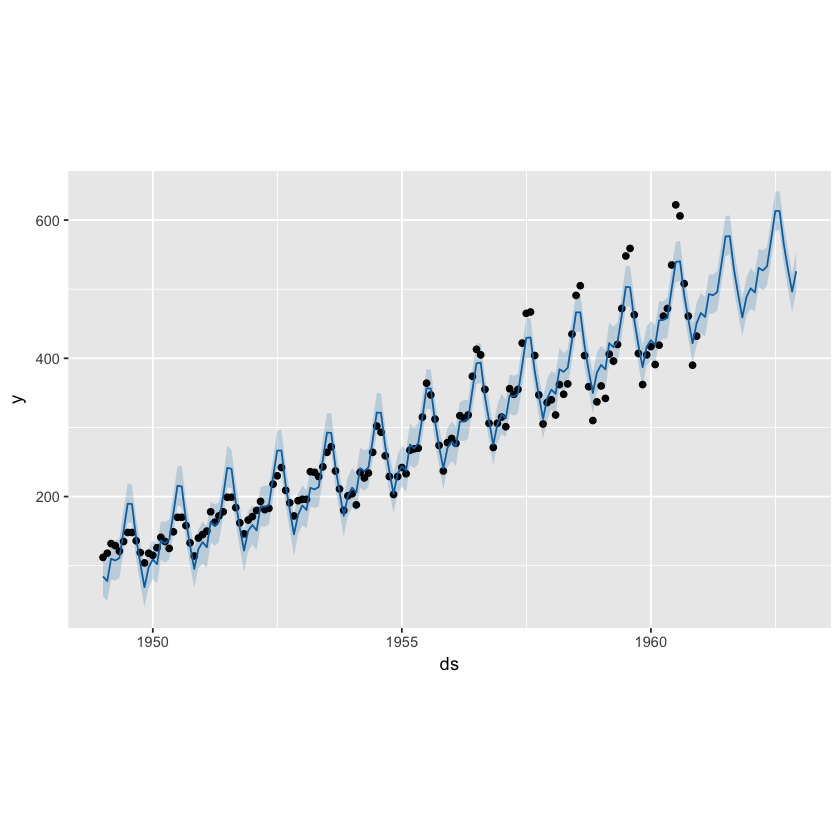

In [214]:
plot(m, forecast)

# 9 Model Evaluation & Selection

## 9.1 Evaluate the accuracy of regression models.

### a) Evaluation on training data.

In [215]:
train <- read.csv('data/boston_train.csv')
head(train)

X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,Target
0.07022,0,4.05,0,0.510,6.020,47.2,3.5549,5,296,16.6,393.23,10.11,23.2
0.12757,30,4.93,0,0.428,6.393,7.8,7.0355,6,300,16.6,374.71,5.19,23.7
0.38735,0,25.65,0,0.581,5.613,95.6,1.7572,2,188,19.1,359.29,27.26,15.7
5.66637,0,18.10,0,0.740,6.219,100.0,2.0048,24,666,20.2,395.69,16.59,18.4
0.31827,0,9.90,0,0.544,5.914,83.2,3.9986,4,304,18.4,390.70,18.33,17.8
4.54192,0,18.10,0,0.770,6.398,88.0,2.5182,24,666,20.2,374.56,7.79,25.0


In [216]:
test <- read.csv('data/boston_test.csv')
head(test)

X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,Target
0.06047,0.0,2.46,0,0.4880,6.153,68.8,3.2797,3,193,17.8,387.11,13.15,29.6
0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05,33.0
0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28,18.2
0.32543,0.0,21.89,0,0.6240,6.431,98.8,1.8125,4,437,21.2,396.90,15.39,18.0
7.83932,0.0,18.10,0,0.6550,6.209,65.4,2.9634,24,666,20.2,396.90,13.22,21.4


In [217]:
set.seed(29)

In [218]:
# Random Forest Regression Model
# call the randomForest package
library(randomForest)

In [219]:
rfMod <- randomForest(Target ~ ., data = train)

In [220]:
# Evaluation on training data
predY <- predict(rfMod, train)
predY <- unname(predY)

In [221]:
# Determine coefficient of determination score
r2_rf <- 1 - ( (sum((train$Target - predY) ** 2)) / (sum((train$Target - mean(train$Target)) ** 2)))
print(paste0("Random forest regression model r^2 score (coefficient of determination): ", r2_rf))

[1] "Random forest regression model r^2 score (coefficient of determination): 0.972080769152132"


### b) Evaluation on testing data.

In [222]:
# Random Forest Regression Model (rfMod) 

# Evaluation on testing data
predY <- predict(rfMod, test)
predY <- unname(predY)

In [223]:
# Determine coefficient of determination score
r2_rf <- 1 - ( (sum((test$Target - predY) ** 2)) / (sum((test$Target - mean(test$Target)) ** 2)))
print(paste0("Random forest regression model r^2 score (coefficient of determination): ", r2_rf))

[1] "Random forest regression model r^2 score (coefficient of determination): 0.886681832095677"


## 9.2 Evaluate the accuracy of classification models.

### a) Evaluation on training data.

In [224]:
train <- read.csv('data/digits_train.csv')
head(train)

X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X55,X56,X57,X58,X59,X60,X61,X62,X63,Target
0,3,15,16,8,0,0,0,0,14,⋯,0,0,2,16,16,15,12,9,0,2
0,0,1,12,8,0,0,0,0,0,⋯,0,0,0,1,14,16,11,1,0,6
0,0,12,16,16,5,0,0,0,3,⋯,0,0,0,13,10,0,0,0,0,7
0,0,3,15,13,2,0,0,0,0,⋯,0,0,0,4,16,15,2,0,0,8
0,0,7,16,16,14,0,0,0,0,⋯,0,0,0,12,16,16,6,0,0,3
0,0,14,12,12,13,3,0,0,0,⋯,0,0,1,15,15,11,3,0,0,5


In [225]:
test <- read.csv('data/digits_test.csv')
head(test)

X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X55,X56,X57,X58,X59,X60,X61,X62,X63,Target
0,0,0,11,16,8,0,0,0,0,⋯,0,0,0,0,12,16,15,0,0,6
0,0,0,4,9,0,0,0,0,0,⋯,0,0,0,0,2,16,3,0,0,4
0,0,8,16,8,0,0,0,0,0,⋯,0,0,0,8,16,15,7,0,0,3
0,0,0,8,14,0,0,0,0,0,⋯,0,0,0,0,11,14,0,0,0,4
0,1,14,16,16,11,2,0,0,0,⋯,0,0,2,13,12,15,2,0,0,8
0,0,0,12,13,5,0,0,0,0,⋯,0,0,0,0,11,16,10,0,0,1


In [226]:
set.seed(29)

In [227]:
# Random Forest Classification Model
# call the randomForest package
library(randomForest)

In [228]:
rfMod <- randomForest(as.factor(Target) ~ ., data = train)

In [229]:
# Evaluation on training data
predY <- predict(rfMod, train)
predY <- unname(predY)

In [230]:
# Determine accuracy score
accuracy_rf <- (1/nrow(train)) * sum(as.numeric(predY == train$Target))
print(paste0("Random forest model accuracy: ", accuracy_rf))

[1] "Random forest model accuracy: 1"


### b) Evaluation on testing data.

In [231]:
# Random Forest Classification Model (rfMod)

# Evaluation on testing data
predY <- predict(rfMod, test)
predY <- unname(predY)

In [232]:
# Determine accuracy score
accuracy_rf <- (1/nrow(test)) * sum(as.numeric(predY == test$Target))
print(paste0("Random forest model accuracy: ", accuracy_rf))

[1] "Random forest model accuracy: 0.974074074074074"


## 9.3 Evaluation with cross validation.

### a) KFold

In [233]:
# Notice we are using a new data set that needs to be read into the 
# environment 
breastcancer <- read.csv('data/breastcancer.csv')
head(breastcancer)

X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X21,X22,X23,X24,X25,X26,X27,X28,X29,Target
17.600,23.33,119.00,980.5,0.09289,0.20040,0.21360,0.10020,0.1696,0.07369,⋯,28.87,143.60,1437.0,0.1207,0.4785,0.5165,0.19960,0.2301,0.12240,0
14.580,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.04349,0.1739,0.05640,⋯,17.24,108.50,862.0,0.1223,0.1928,0.2492,0.09186,0.2626,0.07048,1
8.734,16.84,55.27,234.3,0.10390,0.07428,0.00000,0.00000,0.1985,0.07098,⋯,22.80,64.01,317.0,0.1460,0.1310,0.0000,0.00000,0.2445,0.08865,1
14.440,15.18,93.97,640.1,0.09970,0.10210,0.08487,0.05532,0.1724,0.06081,⋯,19.85,108.60,766.9,0.1316,0.2735,0.3103,0.15990,0.2691,0.07683,1
12.400,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,0.07102,⋯,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359,1
11.080,18.83,73.30,361.6,0.12160,0.21540,0.16890,0.06367,0.2196,0.07950,⋯,32.82,91.76,508.1,0.2184,0.9379,0.8402,0.25240,0.4154,0.14030,0


In [234]:
# call the caret and randomForest packages
library(caret)
library(randomForest)


Attaching package: ‘caret’

The following objects are masked from ‘package:RSNNS’:

    confusionMatrix, train

The following object is masked from ‘package:survival’:

    cluster



In [235]:
set.seed(29)

In [236]:
# Create the 5 cross validation folds
train_control <- trainControl(method = "cv", number = 5, savePredictions = TRUE)

In [237]:
# Convert Target into a factor variable for the random forest model
breastcancer$Target <- factor(breastcancer$Target, levels = c(1,0), labels = c(1, 0))

In [238]:
# Train the model, using the 5 cross validation folds
model <- train(Target ~ ., data = breastcancer, trControl = train_control, method = "rf")

In [239]:
# Assess the accuracy of the model
tab <- model$pred
tab$correct <- (tab$pred == tab$obs)
tab$correct_num <- ifelse(tab$correct=="TRUE", 1, 0)
aggdata <- unname(as.matrix(aggregate(correct_num ~ Resample, tab, sum)))
aggdata <- as.numeric(aggdata[,2])
counts <- unname(table(tab$Resample))
accuracy <- c(0,0,0,0,0)
for (i in 1:5) {
  accuracy[i] <- aggdata[i] / counts[i]
}

In [240]:
print(paste0("Accuracy: ", round(mean(accuracy)*100, digits=2), "% +/- ", round(sd(accuracy)*100, digits=2), "%"))

[1] "Accuracy: 95.77% +/- 1.68%"


### b) ShuffleSplit

In [241]:
# call the caret and randomForest packages
library(caret)
library(randomForest)

In [242]:
set.seed(29)

In [243]:
X <- subset(breastcancer, select = -c(Target))
Y <- breastcancer$Target

In [244]:
# Create the data partition
trainIndex <- createDataPartition(Y, times = 5, p = 0.7, list = FALSE)
accuracy <- c(0, 0, 0, 0, 0)

In [245]:
for (i in 1:5) {
  nam <- paste("data_train", i, sep ="")
  assign(nam, breastcancer[trainIndex[,i],])
  nam <- paste("data_test", i, sep ="")
  assign(nam, breastcancer[-trainIndex[,i],])
}

In [246]:
data_train <- list(data_train1, data_train2, data_train3, data_train4, data_train5)
data_test <- list(data_test1, data_test2, data_test3, data_test4, data_test5)

In [247]:
# Train the model and assess the accuracy
for (i in 1:5) {
  fit <- randomForest(as.factor(Target) ~ ., data = data_train[[i]])
  Prediction <- predict(fit, data_test[[i]])
  Prediction <- unname(Prediction)
  correct <- (data_test[[i]]$Target == Prediction)
  counts <- unname(table(correct))
  accuracy[i] <- counts[2] / sum(counts)
}

In [248]:
print(paste0("Accuracy: ", round(mean(accuracy)*100, digits=2), "% +/- ", round(sd(accuracy)*100, digits = 2), "%"))

[1] "Accuracy: 96.24% +/- 0.53%"


The end.